## <center><ins>File content</ins></center>
### This file was created only for testing the different (hyper-)paremeter values of the CNN model.
### The first part of the code is the same with the main code file.
### The testing begins from the **«Build Text CNN Model»** section.

In [1]:
from pathlib import Path

import pandas as pd
from tqdm import tqdm
from pprint import pprint

# For Jupyter

In [ ]:
class ArgumentParser:

    @staticmethod
    def get_argument_files():
        return list(Path('argument').glob('**/*.csv'))

    def setup_without_context(self):
        files = self.get_argument_files()
        frames = list()

        for file_path in tqdm(files):
            df = pd.read_csv(file_path)
            df['label'] = df['label'].str.strip()
            df['label'].replace('_', 'NO LABEL', inplace=True)
            df['label'].replace('Missing', 'NO LABEL', inplace=True)
            df['label'] = df['label'].str.strip().str.upper()

            frames.append(df)

        data = pd.concat(frames).reset_index(drop=True)
        return {'X': data['sentence'].tolist(),
                'y': data['label'].tolist(),
                'df': data}
    

# ------------------------------------------------
## For google colab

In [2]:
## Mount Google Drive to Collaboratory

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
path = '/content/gdrive/My Drive/Colab Notebooks/dataset/argument'    
# all_files = glob.glob(path + "/*.csv")

In [4]:
class ArgumentParser:

    @staticmethod
    def get_argument_files():
        # return list(Path('argument').glob('**/*.csv'))
        return list(Path(path).glob('**/*.csv'))

    def setup_without_context(self):
        files = self.get_argument_files()
        frames = list()

        for file_path in tqdm(files):
            df = pd.read_csv(file_path)
            df['label'] = df['label'].str.strip()
            df['label'].replace('_', 'NO LABEL', inplace=True)
            df['label'].replace('Missing', 'NO LABEL', inplace=True)
            df['label'] = df['label'].str.strip().str.upper()

            frames.append(df)

        data = pd.concat(frames).reset_index(drop=True)
        return {'X': data['sentence'].tolist(),
                'y': data['label'].tolist(),
                'df': data}
    

# ------------------------------------------------

In [5]:
if __name__ == "__main__":
    parser = ArgumentParser()    # In the ArgumentParser class

    swc_doc = parser.setup_without_context()  # use setup_without_context function
    pprint(swc_doc['X'][:5]) 
    # print('\n')
    pprint(swc_doc['y'][:5])
    print('\n')
    print(swc_doc['df']['label'].value_counts())
    print('\n')
    print(swc_doc['df'])
    # swc_doc = parser.setup_with_context()
    # print(swc_doc['X'][:5])
    # print(swc_doc['y'][:5])
    # print(swc_doc['df']['label'].value_counts())

100%|██████████| 889/889 [03:35<00:00,  4.12it/s]


['\ufeffThe roles of victim and offender alcohol use in sexual assaults: '
 'results from the National Violence Against Women Survey.',
 'OBJECTIVE',
 'The roles of victim and offender alcohol use in the outcomes of sexual '
 'assault incidents (rape completion, injury and medical care) were studied.',
 'METHOD',
 'Data from 859 female sexual assault victims identified from the National '
 'Violence against Women Survey were examined.']
['NO LABEL', 'NO LABEL', 'NO LABEL', 'NO LABEL', 'NO LABEL']


NO LABEL    8588
EVIDENCE    1486
CLAIM        990
Name: label, dtype: int64


          label                                           sentence
0      NO LABEL  ﻿The roles of victim and offender alcohol use ...
1      NO LABEL                                          OBJECTIVE
2      NO LABEL  The roles of victim and offender alcohol use i...
3      NO LABEL                                             METHOD
4      NO LABEL  Data from 859 female sexual assault victims id...
...         ...

# ----------------------------------------------------------

## Rename variables

In [7]:
X = swc_doc['X']
y = swc_doc['y']
df = swc_doc['df']

# ----------------------------------------------------------

In [8]:
'''
Convert to lower case
'''

df['sentence']=df['sentence'].str.lower()

In [9]:
'''
Data Cleaning
'''
import re

# Replace any non-letter, space, or digit character in the headlines.
## remove all special characters, punctuation and spaces from a string so that I only have letters and numbers.

#df['sentence'] = [re.sub(r'\W+',' ',h) for h in df['sentence']] ## \W matches any non-word character (equal to [^a-zA-Z0-9_])
df['sentence'] = [re.sub(r'\d+','',h) for h in df['sentence']] ## \d matches a digit (equal to [0-9])

# Replace sequences of whitespace with a space character.
df['sentence'] = [re.sub(r'\s+',' ', h) for h in df['sentence']] ## \s matches any whitespace character (equal to [\r\n\t\f\v ])
## 1 space mono, oxi parapanw -> gia osa afaire8ikan auto sto telos!!!


# remove punctiation symbols
# Removing punctuations in string 
# Using regex 
df['sentence'] = [re.sub(r'[^\w+\s+]', '', h) for h in df['sentence']]

print(df["sentence"])

0        the roles of victim and offender alcohol use i...
1                                                objective
2        the roles of victim and offender alcohol use i...
3                                                   method
4        data from female sexual assault victims identi...
                               ...                        
11059     two themes and six subthemes arose from the data
11060    the themes were the practice of fgmc and the a...
11061    conclusions fgmc is still widely practiced in ...
11062    studies investigating the experiences of all t...
11063    understanding these phenomena could guide effo...
Name: sentence, Length: 11064, dtype: object


In [10]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [11]:
'''
word tokenization
'''

import nltk

df['tokens'] = df.apply(lambda row: nltk.word_tokenize(row['sentence']), axis=1)

print(df['tokens'][0])

['the', 'roles', 'of', 'victim', 'and', 'offender', 'alcohol', 'use', 'in', 'sexual', 'assaults', 'results', 'from', 'the', 'national', 'violence', 'against', 'women', 'survey']


In [12]:
'''
Removing stopwords
'''

# download stopwords
nltk.download(u'stopwords')

from nltk.corpus import stopwords
# there are also some english stopwords in the Scikit-learn package.
en_stop = stopwords.words('english')


# import stop words from sk learn to enrich the stop words from ntlk
from sklearn.feature_extraction import stop_words 
sk_stop=list(stop_words.ENGLISH_STOP_WORDS)


# combine sklearn and nltk stopwords 
all_stopwords= set(en_stop + sk_stop)



# remove stopwords from sentences to strings 
cleaned_text= df['tokens'].apply(lambda x: [item for item in x if item not in all_stopwords])


print(cleaned_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
0        [roles, victim, offender, alcohol, use, sexual...
1                                              [objective]
2        [roles, victim, offender, alcohol, use, outcom...
3                                                 [method]
4        [data, female, sexual, assault, victims, ident...
                               ...                        
11059                     [themes, subthemes, arose, data]
11060        [themes, practice, fgmc, attempts, end, fgmc]
11061    [conclusions, fgmc, widely, practiced, africa,...
11062    [studies, investigating, experiences, role, pl...
11063    [understanding, phenomena, guide, efforts, cur...
Name: tokens, Length: 11064, dtype: object


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [13]:
clean_textdf2 = pd.DataFrame(cleaned_text) 
print(clean_textdf2["tokens"])

0        [roles, victim, offender, alcohol, use, sexual...
1                                              [objective]
2        [roles, victim, offender, alcohol, use, outcom...
3                                                 [method]
4        [data, female, sexual, assault, victims, ident...
                               ...                        
11059                     [themes, subthemes, arose, data]
11060        [themes, practice, fgmc, attempts, end, fgmc]
11061    [conclusions, fgmc, widely, practiced, africa,...
11062    [studies, investigating, experiences, role, pl...
11063    [understanding, phenomena, guide, efforts, cur...
Name: tokens, Length: 11064, dtype: object


In [ ]:
print(clean_textdf2["tokens"][0])

['roles', 'victim', 'offender', 'alcohol', 'use', 'sexual', 'assaults', 'results', 'national', 'violence', 'women', 'survey']


In [14]:
# nltk.download('wordnet')
from nltk.stem import  WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print(clean_textdf2["tokens"][0][len(clean_textdf2["tokens"][0])-1])
print(lemmatizer.lemmatize(clean_textdf2["tokens"][0][len(clean_textdf2["tokens"][0])-1]))

survey
survey


In [15]:
'''
Lemmatization
'''
# Diafora apo stemming: anti na kopsei, paei na brei to root/riza (to rima) tis leksis
# px: are,is => einai apo to rima 'be' (den mas noiazoun oi xronoi klp)

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

check = clean_textdf2["tokens"].apply(lambda sentence:[lemmatizer.lemmatize(w) for w in sentence])
print(type(check))
clean_textdf2 = pd.DataFrame(check) 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<class 'pandas.core.series.Series'>


### Splitting Dataset Procedure

---
**NOTE:**

Usually we split the data in **3 smaller datasets**
* Training dataset
* Validation dataset
* Test dataset (unseen dataset)

---

For this project we split the data set to 2 sets (train and validation)
in order to measure the accuracy of our models.


In [16]:
from sklearn.preprocessing import OneHotEncoder

# splitting in train-validation-test sets in a stratified manner.
from sklearn.model_selection import StratifiedShuffleSplit

In [17]:
# sss: stratified shuffle split

# We will use this object to split the raw dataset in Train - Test in a stratified manner.
# initialize the test and test object 
test_sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

test_sss

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2,
            train_size=None)

In [18]:
# Creating a dataframe object from list
x = pd.DataFrame(clean_textdf2) 
y = pd.DataFrame(df["label"]) 
x.head(5)

,tokens
0,"[role, victim, offender, alcohol, use, sexual,..."
1,[objective]
2,"[role, victim, offender, alcohol, use, outcome..."
3,[method]
4,"[data, female, sexual, assault, victim, identi..."


In [19]:
# splitting in train and test

x_train, x_test, y_train, y_test = None, None, None, None

# getting the indexes for each dataset
for train_index, test_index in test_sss.split(x, y):
    
    #print("TRAIN:", train_index[:10], "TEST:", test_index[:10])
    
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
print('x_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print()

print()
print('x_test shape: {}'.format(x_test.shape))
print('y_test shape: {}'.format(y_test.shape))

x_train shape: (8851, 1)
y_train shape: (8851, 1)


x_test shape: (2213, 1)
y_test shape: (2213, 1)


# --------------------------------------------------

In [20]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 

%matplotlib inline

# =======================================================
# **Tokenization**
We will count the max words in the training data only.

In [21]:
# !pip install pydot
# !pip install graphviz
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras import metrics
from tensorflow.keras.utils import plot_model
# import pydot

In [22]:
clean_textdf = pd.DataFrame(clean_textdf2) 
print(clean_textdf["tokens"])

0        [role, victim, offender, alcohol, use, sexual,...
1                                              [objective]
2        [role, victim, offender, alcohol, use, outcome...
3                                                 [method]
4        [data, female, sexual, assault, victim, identi...
                               ...                        
11059                      [theme, subthemes, arose, data]
11060          [theme, practice, fgmc, attempt, end, fgmc]
11061    [conclusion, fgmc, widely, practiced, africa, ...
11062    [study, investigating, experience, role, playe...
11063    [understanding, phenomenon, guide, effort, cur...
Name: tokens, Length: 11064, dtype: object


In [23]:
from collections import Counter
# because we had all words in different list, we decided to merge all lists in one single list
# then we use Counter to Count the frequency of each word

# Finding the max words

In [24]:
max_words=len(np.unique(x_train))
print(max_words)

8285


In [25]:
max_words=len(np.unique(x_train))
print(max_words)

temp_90=0.9*max_words
print(temp_90) 

# given that 90% of max_words is 7461.900000000001 we round it and keep 7500

max_words=7500

8285
7456.5


# --------------------------------------------------------

In [26]:
import os
from glob import glob
from typing import Tuple, List
import pandas as pd
import numpy as np
from tensorflow.python.keras.layers import Embedding, Flatten, Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tqdm import tqdm
from ipywidgets import interact

## Keras Tokenizer
First we try with the maximum number of words in the training dataset (num_words=None)

In [27]:
max_words

7500

In [28]:
'''
Keras Tokenizer
'''    
#tokenizer = Tokenizer(num_words=max_words)
# Setting up Keras tokenizer
# We will only consider max_words most used words in this dataset

# Setting up Keras tokenizer
tokenizer = Tokenizer(num_words=max_words, lower=True, oov_token='<OOV>', split=',')
tokenizer

In [29]:
'''
Tokenization and Padding
'''

# this is like the .fit() that we call using Scikit-learn and Count-Vectorizer
tokenizer.fit_on_texts(x_train["tokens"])  # Generate tokens by counting frequency


# this is like the .transform() that we call using Scikit-learn and Count-Vectorizer.
# The major difference is that it turns text into sequence of numbers. NOT one-hot-encoding
# sequences: array of numbers like a dictionary e.g. 28 links to a word such us "movie"
sequences = tokenizer.texts_to_sequences(x_train["tokens"])
#print(sequences)


# The tokenizers word index is a dictionary that maps each word to a number.
word_index = tokenizer.word_index

print('Token for the word "depression": {}'.format(word_index['depression']))

Token for the word "depression": 398


In [30]:
print(max_words) 
print(len(tokenizer.word_index))
print(len(x_train))

7500
10701
8851


## Pre-padding

In [31]:
#### x train ####

# To proceed, we now have to make sure that all text sequences we feed into the model
# have the same length.

# We can do this with Keras pad sequences tool.
# It cuts of sequences that are too long and adds zeros to sequences that are too short.

# Make all sequences 33 words long
maxlen = 33

# pad_sequences is used to ensure that all sequences in a list have the same length. 
# By default this is done by padding 0 in the beginning of each sequence 
# until each sequence has the same length as the longest sequence.
data = pad_sequences(sequences, maxlen=maxlen)

# We have 8851, 33 word sequences now
print('New data shape: {}'.format(data.shape))
print(data)
x_train2=data

New data shape: (8851, 33)
[[   0    0    0 ...  626 1864  760]
 [   0    0    0 ... 1277   12  163]
 [   0    0    0 ...   82   39    6]
 ...
 [   0    0    0 ...  288   56  564]
 [   0    0    0 ... 1197    5  971]
 [   0    0    0 ...  839    1  210]]


In [32]:
#### transform x_test with tokenizer ####

x_test2 = tokenizer.texts_to_sequences(x_test["tokens"])
x_test2 = pad_sequences(x_test2, maxlen=maxlen)
print('New data shape: {}'.format(x_test2.shape))
print(x_test2)

New data shape: (2213, 33)
[[   0    0    0 ... 1161  469 2256]
 [   0    0    0 ...   28   10   86]
 [   0    0    0 ... 2113  351  137]
 ...
 [   0    0    0 ... 4223 5308 2675]
 [   0    0    0 ... 1194  202 2245]
 [   0    0    0 ... 4737   31  722]]


# Label Encoding για τα y επειδη εχουμε multiclass classification

### Labels Encoding 
one hot encoding also explained [here](https://medium.com/hackernoon/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer

In [34]:
# keras only supports one-hot-encoding for data that has already been integer-encoded. 
# You can integer-encode your strings like so:

# Using scikit-learn
from sklearn.preprocessing import LabelEncoder
import numpy as np

y_train_temp = np.array(y_train)
y_test_temp = np.array(y_test)

y_train_new = LabelEncoder().fit_transform(y_train_temp)
y_test_new = LabelEncoder().fit_transform(y_test_temp)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
# checking out the number of classes on our dataset.
print('Classes: ')
print(set(y_train['label'])) 

# print the number of total distinct classes
print(np.max(y_train_new)+1, 'classes')

Classes: 
{'CLAIM', 'EVIDENCE', 'NO LABEL'}
3 classes


In [36]:
dict2 = pd.Series(y_train_new,index=y_train_temp).to_dict()
sort_dict = sorted(dict2.items(), key=lambda x: x[1])
sort_dict

[(('CLAIM',), 0), (('EVIDENCE',), 1), (('NO LABEL',), 2)]

In [37]:
# You can now feed this into keras.utils.to_categorical:

from tensorflow.keras.utils import to_categorical

print('Convert class vector to binary class matrix (for use with categorical_crossentropy)')

# pre-proccessing parameters
num_classes = 3

# to_categorical() function converts the labels to one_hot_encoding!!!!
# convert class vectors to binary class matrices

y_train_one_hot = to_categorical(y_train_new, num_classes)   
y_test_one_hot = to_categorical(y_test_new, num_classes)

y_train_one_hot

Convert class vector to binary class matrix (for use with categorical_crossentropy)


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
print('y_train shape: {}'.format(y_train.shape))
print('y_train shape after One-hot Encoding: {}'.format(y_train_one_hot.shape))
print('\n y_test shape: {}'.format(y_test.shape))
print('y_test shape after One-hot Encoding: {}'.format(y_test_one_hot.shape))

y_train shape: (8851, 1)
y_train shape after One-hot Encoding: (8851, 3)

 y_test shape: (2213, 1)
y_test shape after One-hot Encoding: (2213, 3)


In [38]:
y_train = y_train_one_hot
y_test = y_test_one_hot

In [ ]:
print(y_train)
print(y_train.sum(axis=1))   # sum ana row: exw ola 0 kai enan 1 ana row => opote sum=1

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[1. 1. 1. ... 1. 1. 1.]


# Convolutional Networks for Text Classification

In [39]:
import numpy as np

from tensorflow.python import keras

from tensorflow.python.keras.preprocessing import sequence

from tensorflow.python.keras.models import Sequential

from tensorflow.python.keras.layers import Dense, Dropout, Activation
from tensorflow.python.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D

from tensorflow.python.keras.datasets import imdb

### Using Pre-trained Word Embeddings

#### Glove Embeddings

* https://nlp.stanford.edu/projects/glove/
* We will use the following small pretrained-embedding dataset
* http://nlp.stanford.edu/data/glove.6B.zip

After downloading the GloVe embeddings from the GloVe website we can load them into our model

In [6]:
'''
Using Pre-trained Word Embeddings
'''
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2020-10-16 13:45:20--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-10-16 13:45:20--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-10-16 13:45:20--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

Function that loads glove embeddings

In [40]:
def load_glove_embeddings(dim: int = 100) -> dict:
    """
    Function that loads glove embeddings. 

    :param dim: The embeddings size (dimensions)
    :return:
    """
    print('Loading word vectors')

    embed_index = dict()  # We create a dictionary of word -> embedding

    fname = 'glove.6B.{}d.txt'.format(dim)

    f = open(fname)  # Open file

    # In the dataset, each line represents a new word embedding
    # The line starts with the word and the embedding values follow
    for line in tqdm(f, desc='Loading Embeddings', unit='word'):
        values = line.split()
        # The first value is the word, the rest are the values of the embedding
        word = values[0]
        # Load embedding
        embedding = np.asarray(values[1:], dtype='float32')

        # Add embedding to our embedding dictionary
        embed_index[word] = embedding
    f.close()

    print('Found %s word vectors.' % len(embed_index))

    return embed_index

In [41]:
embedding_dim = 300 

embeddings_index = load_glove_embeddings(dim=embedding_dim)

Loading Embeddings: 0word [00:00, ?word/s]

Loading word vectors


Loading Embeddings: 400000word [00:33, 11964.73word/s]

Found 400000 word vectors.


### Comments:

* This **embedding matrix** can be used **as weights** for the **embedding** layer.
* This way, the **embedding layer** uses the **pre-trained GloVe weights** instead of random ones.
* We can also set the embedding layer to **NOT trainable**. This means, Keras won't change the  weights of the embeddings while training which makes sense since our embeddings are already trained.

* Not all words that are in our IMDB vocabulary might be in the GloVe embedding though.
* For missing words it is wise to use **random embeddings** with the **same mean** and **standard deviation** as the GloVe embeddings

In [42]:
def create_embeddings_matrix(emb_index: dict,
                             tokenizer: Tokenizer,
                             emb_dim: int = 100) -> np.ndarray:
    """

    :param emb_index: Embeddings Index
    :param tokenizer: Keras fitted tokenizer.
    :param emb_dim: Embeddings dimension.
    :return: A matrix of shape (nb_words, emb_dim) containing the globe embeddings.
    """
    assert emb_dim in [50, 100, 200, 300]

    # Create a matrix of all embeddings
    # (stacking=concatenating all the vectors)
    all_embs = np.stack(emb_index.values())  # .values() gets the all the arrays from the keys

    # Calculate mean
    emb_mean = all_embs.mean()
    # Calculate standard deviation
    emb_std = all_embs.std()

    print("Embeddings AVG: {} | STD: {}".format(emb_mean, emb_std))

    # We can now create an embedding matrix holding all word vectors.

    word_index = tokenizer.word_index

    # How many words are there actually. Because we may have requested X most common tokens
    # and the total tokens are X/2
    nb_words = min(max_words2, len(word_index))

    # Create a random matrix with the same mean and std as the embeddings

    embedding_matrix = np.random.normal(emb_mean,  # mean
                                        emb_std,  # std
                                        (nb_words, emb_dim)) # shape of the matrix

    # The vectors need to be in the same position as their index.
    # Meaning a word with token 1 needs to be in the second row (rows start with zero) and so on
    
    counter = 0
    
    # Loop over all words in the word index
    for word, i in word_index.items():  # .items() return a tuple with (word, word_index)

        # If we are above the amount of words we want to use we do nothing
        if i >= max_words2:
            continue

        # Get the embedding vector for the word
        embedding_vector = emb_index.get(word)

        # If there is an embedding vector, put it in the embedding matrix
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            counter += 1
   
    print(f'Found {counter} pre-trained embeddings out of {nb_words}')
    
    return embedding_matrix

In [ ]:
print('x_train max words =', max_words)
print(len(tokenizer.word_index))

x_train max words = 7500
10701


In [43]:
max_words2 = max_words
max_words2

7500

In [44]:
embedding_matrix = create_embeddings_matrix(emb_index=embeddings_index,
                                            tokenizer=tokenizer,
                                            emb_dim=embedding_dim)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


Embeddings AVG: -0.003905011573806405 | STD: 0.3817702829837799
Found 6536 pre-trained embeddings out of 7500


In [ ]:
print(embedding_matrix.shape,'\n')
print(embedding_matrix)

(7500, 300) 

[[-0.55513806 -0.07052084  0.13800041 ... -0.10739538  0.17332882
   0.33154954]
 [-0.10090878 -0.30735774 -0.11425665 ...  0.50684988  0.11530058
  -0.54720295]
 [-0.12675001  0.097588    0.024441   ... -0.64100999 -0.23461001
  -0.18814   ]
 ...
 [-0.1523      0.10892     0.020162   ... -0.18626    -0.21059
  -0.035407  ]
 [-0.05992004 -0.23820654 -0.32238994 ...  0.29825276  0.55254815
  -0.46142659]
 [-0.11143669 -0.28473966  0.25370242 ... -0.46669138  0.16401202
  -0.53098557]]


#### Build Model with Pre-Trained Word Embeddings

In [45]:
def build_model_with_glove_embeddings(maximum_words,
                                      emb_dim,
                                      max_seq_len,
                                      emb_matrix):
    """
    This function builds a Keras model with pre-trained word embeddings

    :param maximum_words: Total number of words to be used by the model
    :param emb_dim: The size of the embeddings vector.
    :param max_seq_len: The sequence length for each text (total number of tokens)
    :param emb_matrix: The pretrained glove embedding matrix to be used as weights.
    :return: a keras sequential model.
    """

    seq_model = Sequential()
    
    seq_model.add(Embedding(input_dim=maximum_words,
                            output_dim=emb_dim,
                            input_length=max_seq_len,
                            weights=[emb_matrix],
                            trainable=False))

    seq_model.add(Flatten())
    seq_model.add(Dense(32, activation='relu'))
    seq_model.add(Dense(1, activation='sigmoid'))

    print(seq_model.summary())

    # Notice that we now have far fewer trainable parameters.
    seq_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['acc'])

    return seq_model

In [ ]:
print('embedding_dim =',embedding_dim)
print('maxlen =',maxlen)

print('tokenizer.word_index= ',len(tokenizer.word_index))

print(max_words)

embedding_dim = 300
maxlen = 33
tokenizer.word_index=  10701
7500


In [46]:
# Now we can turn all data into proper training and validation data.
y_train_ar = np.asarray(y_train)
y_test_ar = np.asarray(y_test)

In [ ]:
print(embedding_matrix.shape,'\n')
print(max_words)

(7500, 300) 

7500


# CNN

In [47]:
import numpy as np

from tensorflow.python import keras

from tensorflow.python.keras.preprocessing import sequence

from tensorflow.python.keras.models import Sequential

from tensorflow.python.keras.layers import Dense, Dropout, Activation
from tensorflow.python.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D

from tensorflow.python.keras.datasets import imdb

In [ ]:
sort_dict

[(('CLAIM',), 0), (('EVIDENCE',), 1), (('NO LABEL',), 2)]

In [ ]:
print('Pad sequences\n')

print('x_train shape: {}'.format(x_train2.shape))   # Pleon exei shape, giati to ekana numpy array -> 34 8eseis mia gia ka8e leksi
print('x_test shape: {}'.format(x_test2.shape))
print('\n')
print('y_Train shape: {}'.format(y_train_ar.shape))
print('y_Test shape: {}'.format(y_test_ar.shape))

Pad sequences

x_train shape: (8851, 33)
x_test shape: (2213, 33)


y_Train shape: (8851, 3)
y_Test shape: (2213, 3)



## Build Text CNN Model

In [ ]:
print('max_words =',max_words,' (vocabulary size kept from x_train)') 
print('maxlen =',maxlen,' (maximum length of tokens to use for each sentence )')
print('tokenizer.word_index= ',len(tokenizer.word_index))

max_words = 7500  (vocabulary size kept from x_train)
maxlen = 33  (maximum length of tokens to use for each sentence )
tokenizer.word_index=  10701


Arguments

•	filters: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).

•	kernel_size: An integer or tuple/list of a single integer, specifying the length of the 1D convolution window.

•	strides: An integer or tuple/list of a single integer, specifying the stride length of the convolution. Specifying any stride value != 1 is incompatible with specifying any dilation_rate value != 1.

•	padding: One of "valid", "same" or "causal" (case-insensitive). 
* "valid" means no padding. 
* "same" results in padding evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input. 
* "causal" results in causal (dilated) convolutions, e.g. output[t] does not depend on input[t+1:].
 Useful when modeling temporal data where the model should not violate the temporal order. 

•	activation: Activation function to use. If you don't specify anything, no activation is applied ( see keras.activations). 


# 1st step: We fit a simple CNN model

In [48]:
# network hyperparameters
embedding_dims = 300
nof_filters = 25
kernel_size = 3   
hidden_dims = 50   

In [ ]:
# The model that we will use is a sequential model meaning that
# each layer that we add per line will use as input the output of the 
# former layer added to the model


## Comment: Inside the embedding layer we will use the number of max features we chose before

In [49]:
print('Build model...')

model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_words,
                    embedding_dims,
                    input_length=maxlen,
                    weights=[embedding_matrix], 
                    trainable=False))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length

model.add(Conv1D(nof_filters, 
                 kernel_size, 
                 padding='valid',
                 activation='relu',
                 strides=1))

model.add(GlobalMaxPooling1D())

model.add(Dense(hidden_dims))

model.add(Activation('relu'))

# since we have a multiclass classification scheme with 3 classes, we selece THREE neurons with SOFTMAX activation.
model.add(Dense(3))
model.add(Activation('softmax'))

Build model...


In [ ]:
print(model.summary())

## conv1d (Conv1D):  (31, 25) : exasa 2 8eseis, output=pli8os filtrwn (ta channels pou elega stis images)
# global_max_pooling1d: epilegw 25 noumera apo auta pou prokiptoun

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 33, 300)           2250000   
_________________________________________________________________
conv1d (Conv1D)              (None, 31, 25)            22525     
_________________________________________________________________
global_max_pooling1d (Global (None, 25)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                1300      
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 153       
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0

In [50]:
# Compile model
# We have a multi-class problem to solve with 3 classes
# that's why we will compile the model using categorical_crossentropy as a loss function. 
# We will also use adam as an optimizer and Accuracy metrics

model.compile(
    loss='categorical_crossentropy',  # multiclass classification task
    optimizer='adam',
    metrics=['accuracy'])

In [51]:
# Setting model hyperparameters
batch_size = 64      # batch mege8ous=32 =>  in each iteration, we consider 128 training examples at once
epochs = 100         # we iterate up to 100 times over the entire training set (depending on the early stopping etc)

### Setting Callbacks

In [52]:
from tensorflow.python.keras.callbacks import EarlyStopping

# early stopping callback

es = keras.callbacks.EarlyStopping(
    monitor   = 'val_loss', # which metric we want to use as criterion to stop training
    min_delta = 0,          # Minimum change in the monitored quantity to qualify as an improvement
    patience  = 4,          # we use 4 epochs before stopping
    verbose   = 1,          # verbosity level
    mode      = 'auto',
    restore_best_weights = True
)

## patience: Number of epochs with no improvement after which training will be stopped.
## https://keras.io/api/callbacks/early_stopping/

# **Fitting (training) our Feed Forward Network Model**


In [ ]:
# We train (fit our data to) our model
history = model.fit(
    x_train2,                               # features
    y_train_ar,                               # labels
    epochs=epochs,                          # numbers of epoch
    batch_size=batch_size,                  # define batch size
    verbose=1,                              # the most extended verbose
    validation_data=(x_test2, y_test_ar),    
)

Epoch 1/100
139/139 [==============================] - 2s 17ms/step - loss: 0.6392 - accuracy: 0.7682 - val_loss: 0.5752 - val_accuracy: 0.7772
Epoch 2/100
139/139 [==============================] - 2s 15ms/step - loss: 0.5182 - accuracy: 0.8035 - val_loss: 0.5425 - val_accuracy: 0.7903
Epoch 3/100
139/139 [==============================] - 2s 15ms/step - loss: 0.4482 - accuracy: 0.8254 - val_loss: 0.5388 - val_accuracy: 0.7935
Epoch 4/100
139/139 [==============================] - 2s 15ms/step - loss: 0.3851 - accuracy: 0.8512 - val_loss: 0.5631 - val_accuracy: 0.7817
Epoch 5/100
139/139 [==============================] - 2s 14ms/step - loss: 0.3189 - accuracy: 0.8801 - val_loss: 0.6074 - val_accuracy: 0.7759
Epoch 6/100
139/139 [==============================] - 2s 15ms/step - loss: 0.2617 - accuracy: 0.9053 - val_loss: 0.6795 - val_accuracy: 0.7732
Epoch 7/100
139/139 [==============================] - 2s 15ms/step - loss: 0.2099 - accuracy: 0.9271 - val_loss: 0.7666 - val_accuracy:

In [ ]:
# We train (fit our data to) our model
history01 = model.fit(
    x_train2,                               # features
    y_train_ar,                             # labels
    epochs=epochs,                          # numbers of epoch
    batch_size=batch_size,                  # define batch size
    verbose=1,                              # the most extended verbose
    validation_data=(x_test2, y_test_ar),    
    callbacks=[es]
)

Epoch 1/100
139/139 [==============================] - 2s 15ms/step - loss: 0.0041 - accuracy: 0.9980 - val_loss: 2.7513 - val_accuracy: 0.7397
Epoch 2/100
139/139 [==============================] - 2s 15ms/step - loss: 0.0045 - accuracy: 0.9977 - val_loss: 2.6498 - val_accuracy: 0.7235
Epoch 3/100
139/139 [==============================] - 2s 15ms/step - loss: 0.0054 - accuracy: 0.9976 - val_loss: 2.6241 - val_accuracy: 0.7189
Epoch 4/100
139/139 [==============================] - 2s 15ms/step - loss: 0.0052 - accuracy: 0.9974 - val_loss: 2.5938 - val_accuracy: 0.7289
Epoch 5/100
139/139 [==============================] - 2s 15ms/step - loss: 0.0041 - accuracy: 0.9979 - val_loss: 2.6958 - val_accuracy: 0.7375
Epoch 6/100
139/139 [==============================] - 2s 15ms/step - loss: 0.0046 - accuracy: 0.9973 - val_loss: 2.6805 - val_accuracy: 0.7329
Epoch 7/100
139/139 [==============================] - 2s 15ms/step - loss: 0.0036 - accuracy: 0.9981 - val_loss: 2.6933 - val_accuracy:

The results are similar using Callbacks, so for performance reasons we will only implement  **early stopping** in our analysis from now on.


In [ ]:
# Evaluate the trained model on the training set and store on score variable

score0 = model.evaluate(
    x_train2,                  # features
    y_train_ar,                # labels
    batch_size=batch_size,     # batch size
    verbose=1                  # the most extended verbose
)

print('\nTraining categorical_crossentropy: {:.4f}'.format(score0[0]))
print('\nTraining accuracy: {:.3f} %'.format(score0[1]*100))

139/139 [==============================] - 1s 5ms/step - loss: 0.0031 - accuracy: 0.9983

Training categorical_crossentropy: 0.0031

Training accuracy: 99.831 %


### Loss plots kai accuracy plots

In [54]:
def plot_keras_history(history):
    """
    
    :param history: 
    :return: 
    """
    # the history object gives the metrics keys. 
    # we will store the metrics keys that are from the training sesion.
    metrics_names = [key for key in history.history.keys() if not key.startswith('val_')]

    for i, metric in enumerate(metrics_names):
        
        # getting the training values
        metric_train_values = history.history.get(metric, [])
        
        # getting the validation values
        metric_val_values = history.history.get("val_{}".format(metric), [])

        # As loss always exists as a metric we use it to find the 
        epochs = range(1, len(metric_train_values) + 1)
        
        # leaving extra spaces to allign with the validation text
        training_text = "   Training {}: {:.5f}".format(metric,
                                                        metric_train_values[-1])

        # metric
        plt.figure(i, figsize=(12, 6))

        plt.plot(epochs,
                 metric_train_values,
                 'b',
                 label=training_text)
        
        # if we validation metric exists, then plot that as well
        if metric_val_values:
            validation_text = "Validation {}: {:.5f}".format(metric,
                                                             metric_val_values[-1])

            plt.plot(epochs,
                     metric_val_values,
                     'g',
                     label=validation_text)
        
        # add title, xlabel, ylabe, and legend
        plt.title('Model Metric: {}'.format(metric))
        plt.xlabel('Epochs')
        plt.ylabel(metric.title())
        plt.legend()

    plt.show()

# ----------------------------------------------------------------------

In [55]:
from itertools import cycle
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import interp

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential

In [ ]:
model4e0 = Sequential()

model4e0.add(Embedding(max_words2, embedding_dims, input_length=maxlen, weights=[embedding_matrix], trainable=False)) 

# adding a Convolution1D layer with 30 filters
model4e0.add(Conv1D(25, kernel_size, padding='valid', activation='relu', strides=1))

model4e0.add(GlobalMaxPooling1D())

model4e0.add(Dense(hidden_dims))

model4e0.add(Activation('relu'))

model4e0.add(Dense(3))
model4e0.add(Activation('softmax'))

In [ ]:
model4e4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# We train (fit our data to) our model
history4e = model4e.fit(x_train2, y_train_ar, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_test2, y_test_ar),callbacks=[es])

Epoch 1/100
139/139 [==============================] - 2s 15ms/step - loss: 0.4409 - accuracy: 0.8282 - val_loss: 0.5323 - val_accuracy: 0.7930
Epoch 2/100
139/139 [==============================] - 2s 16ms/step - loss: 0.3898 - accuracy: 0.8479 - val_loss: 0.5523 - val_accuracy: 0.7786
Epoch 3/100
139/139 [==============================] - 2s 15ms/step - loss: 0.3412 - accuracy: 0.8695 - val_loss: 0.5956 - val_accuracy: 0.7610
Epoch 4/100
139/139 [==============================] - 2s 15ms/step - loss: 0.2817 - accuracy: 0.8975 - val_loss: 0.6412 - val_accuracy: 0.7777
Epoch 5/100
139/139 [==============================] - 2s 15ms/step - loss: 0.2239 - accuracy: 0.9245 - val_loss: 0.7167 - val_accuracy: 0.7659
Epoch 00005: early stopping


#2nd step: We will add layers with different number of output filters in the convolution.
The results will be compared only on the **training set** and we will check the accuracy for each one of the results to see if its getting better or worse.

Our starting model had 25 filters.

We made the following comparisons with our starting model considering the number of filters:
* a] 1 filter
* b] 5 filters
* c] 10 filters
* d] 15 filters
* e] 30 filters

Then we will add some extra layers to see what happens
* f1] one layer with 10 filters and another layer with 15 filters
* f2] one layer with 15 filters and another layer with 25 filters
* f3] one layer with 15 filters, one layer with 20 and another one with 30 filters

### At first, we want our results to be as good as possible for the training test. So, the number of filters and the kernel size will be tested in the **training data**.

In [ ]:
model4a = Sequential()

model4a.add(Embedding(max_words2, embedding_dims, input_length=maxlen, weights=[embedding_matrix], trainable=False)) 

# adding a Convolution1D layer with 1 filter
model4a.add(Conv1D(1, kernel_size, padding='valid', activation='relu', strides=1))

model4a.add(GlobalMaxPooling1D())

model4a.add(Dense(hidden_dims))

model4a.add(Activation('relu'))

# model4a.add(Flatten())

model4a.add(Dense(3))
model4a.add(Activation('softmax'))

In [ ]:
model4a.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# We train (fit our data to) our model
history4a = model4a.fit(x_train2, y_train_ar, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_test2, y_test_ar),callbacks=[es])

Epoch 1/100
139/139 [==============================] - 2s 12ms/step - loss: 0.7973 - accuracy: 0.7338 - val_loss: 0.6739 - val_accuracy: 0.7763
Epoch 2/100
139/139 [==============================] - 1s 10ms/step - loss: 0.6604 - accuracy: 0.7762 - val_loss: 0.6530 - val_accuracy: 0.7763
Epoch 3/100
139/139 [==============================] - 1s 9ms/step - loss: 0.6429 - accuracy: 0.7762 - val_loss: 0.6408 - val_accuracy: 0.7763
Epoch 4/100
139/139 [==============================] - 1s 9ms/step - loss: 0.6321 - accuracy: 0.7762 - val_loss: 0.6331 - val_accuracy: 0.7763
Epoch 5/100
139/139 [==============================] - 1s 9ms/step - loss: 0.6258 - accuracy: 0.7762 - val_loss: 0.6304 - val_accuracy: 0.7763
Epoch 6/100
139/139 [==============================] - 1s 10ms/step - loss: 0.6186 - accuracy: 0.7762 - val_loss: 0.6288 - val_accuracy: 0.7763
Epoch 7/100
139/139 [==============================] - 1s 9ms/step - loss: 0.6127 - accuracy: 0.7762 - val_loss: 0.6204 - val_accuracy: 0.7

The final results from the model with one layer with 1 filter are: 
* loss: 0.5891 - accuracy: 0.7807 - val_loss: 0.6242 - val_accuracy: 0.7736

The final results from the model with one layer with 25 filters are: 
* loss: 0.2239 - accuracy: 0.9245 - val_loss: 0.7167 - val_accuracy: 0.7659


The results are close in the validaiton data, but in training we have a big difference both in accuracy and loss.
So the best is the one with 25 filters.


In [ ]:
model4b = Sequential()

model4b.add(Embedding(max_words2, embedding_dims, input_length=maxlen, weights=[embedding_matrix], trainable=False))
 

# adding a Convolution1D layer with 5 filters
model4b.add(Conv1D(5, kernel_size, padding='valid', activation='relu', strides=1))

model4b.add(GlobalMaxPooling1D())

model4b.add(Dense(hidden_dims))

model4b.add(Activation('relu'))

model4b.add(Dense(3))
model4b.add(Activation('softmax'))

In [ ]:
model4b.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# We train (fit our data to) our model
history4b = model4b.fit(x_train2, y_train_ar, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_test2, y_test_ar),callbacks=[es])

Epoch 1/100
139/139 [==============================] - 1s 11ms/step - loss: 0.6565 - accuracy: 0.7758 - val_loss: 0.6060 - val_accuracy: 0.7759
Epoch 2/100
139/139 [==============================] - 1s 10ms/step - loss: 0.5778 - accuracy: 0.7810 - val_loss: 0.5750 - val_accuracy: 0.7831
Epoch 3/100
139/139 [==============================] - 1s 10ms/step - loss: 0.5443 - accuracy: 0.7917 - val_loss: 0.5564 - val_accuracy: 0.7917
Epoch 4/100
139/139 [==============================] - 1s 10ms/step - loss: 0.5184 - accuracy: 0.8007 - val_loss: 0.5576 - val_accuracy: 0.7903
Epoch 5/100
139/139 [==============================] - 1s 10ms/step - loss: 0.5000 - accuracy: 0.8049 - val_loss: 0.5563 - val_accuracy: 0.7899
Epoch 6/100
139/139 [==============================] - 1s 10ms/step - loss: 0.4805 - accuracy: 0.8127 - val_loss: 0.5729 - val_accuracy: 0.7732
Epoch 7/100
139/139 [==============================] - 1s 10ms/step - loss: 0.4633 - accuracy: 0.8178 - val_loss: 0.5576 - val_accuracy:

The final results from the model with one layer with 5 filters are: 
* loss: 0.4383 - accuracy: 0.8275 - val_loss: 0.5743 - val_accuracy: 0.7704

The final results from the model with one layer with 25 filters are: 
* loss: 0.2239 - accuracy: 0.9245 - val_loss: 0.7167 - val_accuracy: 0.7659

The results are close in the validaiton data, but in training we have a big difference both in accuracy and loss.
So the best is the one with 25 filters.

In [ ]:
model4c = Sequential()

model4c.add(Embedding(max_words2, embedding_dims, input_length=maxlen, weights=[embedding_matrix], trainable=False))

# adding a Convolution1D layer with 10 filters 
model4c.add(Conv1D(10, kernel_size, padding='valid', activation='relu', strides=1))

model4c.add(GlobalMaxPooling1D())

model4c.add(Dense(hidden_dims))

model4c.add(Activation('relu'))

model4c.add(Dense(3))
model4c.add(Activation('softmax'))

In [ ]:
model4c.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# We train (fit our data to) our model
history4c = model4c.fit(x_train2, y_train_ar, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_test2, y_test_ar),callbacks=[es])

Epoch 1/100
139/139 [==============================] - 2s 14ms/step - loss: 0.6407 - accuracy: 0.7765 - val_loss: 0.5818 - val_accuracy: 0.7763
Epoch 2/100
139/139 [==============================] - 2s 13ms/step - loss: 0.5383 - accuracy: 0.7953 - val_loss: 0.5431 - val_accuracy: 0.7976
Epoch 3/100
139/139 [==============================] - 2s 13ms/step - loss: 0.4827 - accuracy: 0.8130 - val_loss: 0.5513 - val_accuracy: 0.7980
Epoch 4/100
139/139 [==============================] - 2s 13ms/step - loss: 0.4470 - accuracy: 0.8226 - val_loss: 0.5416 - val_accuracy: 0.7921
Epoch 5/100
139/139 [==============================] - 2s 13ms/step - loss: 0.4079 - accuracy: 0.8376 - val_loss: 0.5559 - val_accuracy: 0.7826
Epoch 6/100
139/139 [==============================] - 2s 13ms/step - loss: 0.3703 - accuracy: 0.8559 - val_loss: 0.5767 - val_accuracy: 0.7750
Epoch 7/100
139/139 [==============================] - 2s 12ms/step - loss: 0.3434 - accuracy: 0.8650 - val_loss: 0.6032 - val_accuracy:

The final results from the model with one layer with 10 filters are: 
* loss: 0.3180 - accuracy: 0.8771 - val_loss: 0.6372 - val_accuracy: 0.7736

The final results from the model with one layer with 25 filters are: 
* loss: 0.2239 - accuracy: 0.9245 - val_loss: 0.7167 - val_accuracy: 0.7659

The results are close but in the validation data we have better accuracy and loss.
So the best is the one with 10 filters.

In [ ]:
model4d = Sequential()

model4d.add(Embedding(max_words2, embedding_dims, input_length=maxlen, weights=[embedding_matrix], trainable=False))  

# adding a Convolution1D layer with 15 filters
model4d.add(Conv1D(15, kernel_size, padding='valid', activation='relu', strides=1))

model4d.add(GlobalMaxPooling1D())

model4d.add(Dense(hidden_dims))

model4d.add(Activation('relu'))

model4d.add(Dense(3))
model4d.add(Activation('softmax'))

In [ ]:
model4d.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# We train (fit our data to) our model
history4d = model4d.fit(x_train2, y_train_ar, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_test2, y_test_ar),callbacks=[es])

Epoch 1/100
139/139 [==============================] - 2s 13ms/step - loss: 0.4870 - accuracy: 0.8118 - val_loss: 0.5547 - val_accuracy: 0.7790
Epoch 2/100
139/139 [==============================] - 2s 12ms/step - loss: 0.4389 - accuracy: 0.8306 - val_loss: 0.5557 - val_accuracy: 0.7876
Epoch 3/100
139/139 [==============================] - 2s 12ms/step - loss: 0.3922 - accuracy: 0.8501 - val_loss: 0.5775 - val_accuracy: 0.7601
Epoch 4/100
139/139 [==============================] - 2s 12ms/step - loss: 0.3477 - accuracy: 0.8682 - val_loss: 0.6033 - val_accuracy: 0.7750
Epoch 5/100
139/139 [==============================] - 2s 12ms/step - loss: 0.3003 - accuracy: 0.8893 - val_loss: 0.6924 - val_accuracy: 0.7849
Epoch 00005: early stopping


The final results from the model with one layer with 15 filters are: 
* loss: 0.3003 - accuracy: 0.8893 - val_loss: 0.6924 - val_accuracy: 0.7849

The final results from the model with one layer with 10 filters are: 
* loss: 0.3180 - accuracy: 0.8771 - val_loss: 0.6372 - val_accuracy: 0.7736


So the best is the one with 15 filters, due to slightly better validation accuracy, as well as loss value.

In [ ]:
model4e = Sequential()

model4e.add(Embedding(max_words2, embedding_dims, input_length=maxlen, weights=[embedding_matrix], trainable=False)) 

# adding a Convolution1D layer with 30 filters
model4e.add(Conv1D(30, kernel_size, padding='valid', activation='relu', strides=1))

model4e.add(GlobalMaxPooling1D())

model4e.add(Dense(hidden_dims))

model4e.add(Activation('relu'))

model4e.add(Dense(3))
model4e.add(Activation('softmax'))

In [ ]:
model4e.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# We train (fit our data to) our model
history4e = model4e.fit(x_train2, y_train_ar, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_test2, y_test_ar),callbacks=[es])

Epoch 1/100
139/139 [==============================] - 2s 17ms/step - loss: 0.6352 - accuracy: 0.7692 - val_loss: 0.5553 - val_accuracy: 0.7872
Epoch 2/100
139/139 [==============================] - 2s 15ms/step - loss: 0.5087 - accuracy: 0.8069 - val_loss: 0.5215 - val_accuracy: 0.7962
Epoch 3/100
139/139 [==============================] - 2s 15ms/step - loss: 0.4445 - accuracy: 0.8288 - val_loss: 0.5333 - val_accuracy: 0.7885
Epoch 4/100
139/139 [==============================] - 2s 15ms/step - loss: 0.3846 - accuracy: 0.8511 - val_loss: 0.5500 - val_accuracy: 0.7863
Epoch 5/100
139/139 [==============================] - 2s 15ms/step - loss: 0.3167 - accuracy: 0.8810 - val_loss: 0.6245 - val_accuracy: 0.7840
Epoch 6/100
139/139 [==============================] - 2s 15ms/step - loss: 0.2492 - accuracy: 0.9100 - val_loss: 0.6706 - val_accuracy: 0.7650
Epoch 00006: early stopping


The final results from the model with one layer with 30 filters are: 
* loss: 0.2492 - accuracy: 0.9100 - val_loss: 0.6706 - val_accuracy: 0.7650

The final results from the model with one layer with 15 filters are: 
* loss: 0.3003 - accuracy: 0.8893 - val_loss: 0.6924 - val_accuracy: 0.7849

The results are close in training accurayc and loss, but the validaiton accuracy and loss are best for the latter case.

So the best is the one with 15 filters.

# -------------------------------------------------------------

In [ ]:
model4f = Sequential()

model4f.add(Embedding(max_words2, embedding_dims, input_length=maxlen, weights=[embedding_matrix], trainable=False)) 

# adding a Convolution1D layer with 10 filters 
model4f.add(Conv1D(10, kernel_size, padding='valid', activation='relu', strides=1))

# adding a Convolution1D layer with 15 filters 
model4f.add(Conv1D(15, kernel_size, padding='valid', activation='relu', strides=1))

model4f.add(GlobalMaxPooling1D())

model4f.add(Dense(hidden_dims))

model4f.add(Activation('relu'))


# model4f.add(Flatten())

model4f.add(Dense(3))
model4f.add(Activation('softmax'))

In [ ]:
model4f.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# We train (fit our data to) our model
history4f = model4f.fit(x_train2, y_train_ar, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_test2, y_test_ar),callbacks=[es])

Epoch 1/100
139/139 [==============================] - 2s 15ms/step - loss: 0.6869 - accuracy: 0.7639 - val_loss: 0.6281 - val_accuracy: 0.7763
Epoch 2/100
139/139 [==============================] - 2s 14ms/step - loss: 0.5939 - accuracy: 0.7766 - val_loss: 0.5782 - val_accuracy: 0.7763
Epoch 3/100
139/139 [==============================] - 2s 14ms/step - loss: 0.5458 - accuracy: 0.7874 - val_loss: 0.5720 - val_accuracy: 0.7768
Epoch 4/100
139/139 [==============================] - 2s 14ms/step - loss: 0.4998 - accuracy: 0.8057 - val_loss: 0.5663 - val_accuracy: 0.7908
Epoch 5/100
139/139 [==============================] - 2s 14ms/step - loss: 0.4626 - accuracy: 0.8200 - val_loss: 0.5715 - val_accuracy: 0.7854
Epoch 6/100
139/139 [==============================] - 2s 14ms/step - loss: 0.4297 - accuracy: 0.8330 - val_loss: 0.5780 - val_accuracy: 0.7872
Epoch 7/100
139/139 [==============================] - 2s 14ms/step - loss: 0.3985 - accuracy: 0.8491 - val_loss: 0.5784 - val_accuracy:

The final results from the model with one layer with 15 filters are: 
* loss: 0.3003 - accuracy: 0.8893 - val_loss: 0.6924 - val_accuracy: 0.7849


The final results from the model with two layers, one with 10 and one with 15 filters are: 
* loss: 0.3677 - accuracy: 0.8585 - val_loss: 0.6087 - val_accuracy: 0.7700

So the best is the one with 15 filters, due to higher values of accuracy in both training and validation data.

The addition of another layer did not help improve the accuracy and descrease the loss.

In [ ]:
model4f4 = Sequential()

model4f4.add(Embedding(max_words2, embedding_dims, input_length=maxlen, weights=[embedding_matrix], trainable=False)) 

# adding a Convolution1D layer with 15 filters 
model4f4.add(Conv1D(15, kernel_size, padding='valid', activation='relu', strides=1))

# adding a Convolution1D layer with 25 filters 
model4f4.add(Conv1D(25, kernel_size, padding='valid', activation='relu', strides=1))

model4f4.add(GlobalMaxPooling1D())

model4f4.add(Dense(hidden_dims))

model4f4.add(Activation('relu'))


# model4f.add(Flatten())

model4f4.add(Dense(3))
model4f4.add(Activation('softmax'))

In [ ]:
model4f4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# We train (fit our data to) our model
history4f4 = model4f4.fit(x_train2, y_train_ar, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_test2, y_test_ar),callbacks=[es])

Epoch 1/100
139/139 [==============================] - 2s 16ms/step - loss: 0.6513 - accuracy: 0.7796 - val_loss: 0.5709 - val_accuracy: 0.7944
Epoch 2/100
139/139 [==============================] - 2s 14ms/step - loss: 0.5388 - accuracy: 0.7972 - val_loss: 0.5572 - val_accuracy: 0.7971
Epoch 3/100
139/139 [==============================] - 2s 15ms/step - loss: 0.4839 - accuracy: 0.8119 - val_loss: 0.5267 - val_accuracy: 0.7985
Epoch 4/100
139/139 [==============================] - 2s 14ms/step - loss: 0.4343 - accuracy: 0.8300 - val_loss: 0.5558 - val_accuracy: 0.7872
Epoch 5/100
139/139 [==============================] - 2s 14ms/step - loss: 0.3849 - accuracy: 0.8524 - val_loss: 0.5487 - val_accuracy: 0.7921
Epoch 6/100
139/139 [==============================] - 2s 14ms/step - loss: 0.3434 - accuracy: 0.8726 - val_loss: 0.5977 - val_accuracy: 0.7926
Epoch 7/100
139/139 [==============================] - 2s 15ms/step - loss: 0.2985 - accuracy: 0.8881 - val_loss: 0.6305 - val_accuracy:

The final results from the model with one layer with 15 filters are: 
* * loss: 0.3003 - accuracy: 0.8893 - val_loss: 0.6924 - val_accuracy: 0.7849

The final results from the model with two layers, one with 15 and one with 25 filters are: 
* loss: 0.2985 - accuracy: 0.8881 - val_loss: 0.6305 - val_accuracy: 0.7885

The results are similar, but we will keep the one with two layers of 15 and 25 filters, due to slightly higher values of accuracy in both training and validation data, as well as lower loss value.

In [ ]:
model4f43 = Sequential()

model4f43.add(Embedding(max_words2, embedding_dims, input_length=maxlen, weights=[embedding_matrix], trainable=False)) 

# adding a Convolution1D layer with 15 filters 
model4f43.add(Conv1D(15, kernel_size, padding='valid', activation='relu', strides=1))

# adding a Convolution1D layer with 25 filters 
model4f43.add(Conv1D(20, kernel_size, padding='valid', activation='relu', strides=1))

# adding a Convolution1D layer with 25 filters 
model4f43.add(Conv1D(30, kernel_size, padding='valid', activation='relu', strides=1))


model4f43.add(GlobalMaxPooling1D())

model4f43.add(Dense(hidden_dims))

model4f43.add(Activation('relu'))

# model4f.add(Flatten())

model4f43.add(Dense(3))
model4f43.add(Activation('softmax'))

In [ ]:
model4f43.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# We train (fit our data to) our model
history4f43 = model4f43.fit(x_train2, y_train_ar, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_test2, y_test_ar),callbacks=[es])

Epoch 1/100
139/139 [==============================] - 3s 18ms/step - loss: 0.7122 - accuracy: 0.7497 - val_loss: 0.6160 - val_accuracy: 0.7763
Epoch 2/100
139/139 [==============================] - 2s 17ms/step - loss: 0.5890 - accuracy: 0.7761 - val_loss: 0.5704 - val_accuracy: 0.7763
Epoch 3/100
139/139 [==============================] - 2s 16ms/step - loss: 0.5202 - accuracy: 0.7981 - val_loss: 0.5453 - val_accuracy: 0.7971
Epoch 4/100
139/139 [==============================] - 2s 16ms/step - loss: 0.4694 - accuracy: 0.8135 - val_loss: 0.5482 - val_accuracy: 0.7917
Epoch 5/100
139/139 [==============================] - 2s 16ms/step - loss: 0.4273 - accuracy: 0.8302 - val_loss: 0.5630 - val_accuracy: 0.7899
Epoch 6/100
139/139 [==============================] - 2s 15ms/step - loss: 0.3851 - accuracy: 0.8477 - val_loss: 0.5926 - val_accuracy: 0.7912
Epoch 7/100
139/139 [==============================] - 2s 16ms/step - loss: 0.3448 - accuracy: 0.8662 - val_loss: 0.6438 - val_accuracy:

The final results from the model with two layers, one with 15 and one with 25 filters are: 
* loss: 0.2985 - accuracy: 0.8881 - val_loss: 0.6305 - val_accuracy: 0.7885

The final results from the model with three layers, one with 15, one with 20 and one with 30 filters are: 
* loss: 0.3448 - accuracy: 0.8662 - val_loss: 0.6438 - val_accuracy: 0.7492


As a result, we deemed as the best the one with two layers of 15 and 25 filters, due to higher values of accuracy in both validaion and traiing set, as well as less value in loss.

So, the addition of a 3rd layer did not help improve the accuracy and descrease the loss.

# So, we will use the model which has two layers, one with 15 and one with 25 filters.

# ----------------------------------------------------------------------

#3rd step: We will check what happens if we change the kernel_size, which specifies the length of the 1D convolution window.


We can afford to use larger convolution windows with 1D CNNs, because a window of size 3 contains only 3 feature vectors. We can thus easily afford 1D convolution windows of size 7 or 9.

The results will be compared only on the **training set** and we will check the accuracy for each one of the results to see if its getting better or worse.


Our starting model had kernel size equal to 3.

We made the following comparisons with our starting model considering the size of the kernel:
* a] 6
* b] 7
* c] 9

In [ ]:
# network hyperparameters
embedding_dims = 300
nof_filters = 15
kernel_size = 3   
hidden_dims = 50  

In [ ]:
kernel_size = 6

model5a = Sequential()

model5a.add(Embedding(max_words2, embedding_dims, input_length=maxlen, weights=[embedding_matrix], trainable=False))   

# adding a Convolution1D layer with 15 filters 
model5a.add(Conv1D(nof_filters, kernel_size, padding='valid', activation='relu', strides=1))

# adding a Convolution1D layer with 25 filters 
model5a.add(Conv1D(25, kernel_size, padding='valid', activation='relu', strides=1))

model5a.add(GlobalMaxPooling1D())

model5a.add(Dense(hidden_dims))

model5a.add(Activation('relu'))

# model4f.add(Flatten())

model5a.add(Dense(3))
model5a.add(Activation('softmax'))

In [ ]:
model5a.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# We train (fit our data to) our model
history5a = model5a.fit(x_train2, y_train_ar, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_test2, y_test_ar),callbacks=[es])

Epoch 1/100
139/139 [==============================] - 3s 22ms/step - loss: 0.6569 - accuracy: 0.7746 - val_loss: 0.6025 - val_accuracy: 0.7777
Epoch 2/100
139/139 [==============================] - 3s 21ms/step - loss: 0.5524 - accuracy: 0.7913 - val_loss: 0.5504 - val_accuracy: 0.7876
Epoch 3/100
139/139 [==============================] - 3s 21ms/step - loss: 0.4843 - accuracy: 0.8193 - val_loss: 0.5450 - val_accuracy: 0.7822
Epoch 4/100
139/139 [==============================] - 3s 21ms/step - loss: 0.4228 - accuracy: 0.8407 - val_loss: 0.5685 - val_accuracy: 0.7741
Epoch 5/100
139/139 [==============================] - 3s 21ms/step - loss: 0.3637 - accuracy: 0.8689 - val_loss: 0.5968 - val_accuracy: 0.7759
Epoch 6/100
139/139 [==============================] - 3s 21ms/step - loss: 0.2996 - accuracy: 0.8956 - val_loss: 0.6496 - val_accuracy: 0.7799
Epoch 7/100
139/139 [==============================] - 3s 21ms/step - loss: 0.2135 - accuracy: 0.9323 - val_loss: 0.7179 - val_accuracy:

The final results from the model with kernel size equal to 6 is: 
* loss: 0.2135 - accuracy: 0.9323 - val_loss: 0.7179 - val_accuracy: 0.7488

The final results from the model with kernel size equal to 3 is: 
* loss: 0.2985 - accuracy: 0.8881 - val_loss: 0.6305 - val_accuracy: 0.7885


So, the best is with kernel size = 3.

In [ ]:
kernel_size = 7

model5b = Sequential()

model5b.add(Embedding(max_words2, embedding_dims, input_length=maxlen, weights=[embedding_matrix], trainable=False))     

# adding a Convolution1D layer with 15 filters and kernel size equal to 7
model5b.add(Conv1D(nof_filters, kernel_size = kernel_size, padding='valid', activation='relu', strides=1))

# adding a Convolution1D layer with 25 filters 
model5b.add(Conv1D(25, kernel_size = kernel_size, padding='valid', activation='relu', strides=1))

model5b.add(GlobalMaxPooling1D())

model5b.add(Dense(hidden_dims))

model5b.add(Activation('relu'))

model5b.add(Dense(3))
model5b.add(Activation('softmax'))

In [ ]:
model5b.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# We train (fit our data to) our model
history5b = model5b.fit(x_train2, y_train_ar, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_test2, y_test_ar),callbacks=[es])

Epoch 1/100
139/139 [==============================] - 3s 24ms/step - loss: 0.6701 - accuracy: 0.7700 - val_loss: 0.6123 - val_accuracy: 0.7763
Epoch 2/100
139/139 [==============================] - 3s 22ms/step - loss: 0.5763 - accuracy: 0.7869 - val_loss: 0.5673 - val_accuracy: 0.7840
Epoch 3/100
139/139 [==============================] - 3s 22ms/step - loss: 0.4853 - accuracy: 0.8183 - val_loss: 0.5580 - val_accuracy: 0.7962
Epoch 4/100
139/139 [==============================] - 3s 22ms/step - loss: 0.4160 - accuracy: 0.8440 - val_loss: 0.5722 - val_accuracy: 0.7872
Epoch 5/100
139/139 [==============================] - 3s 22ms/step - loss: 0.3364 - accuracy: 0.8772 - val_loss: 0.6140 - val_accuracy: 0.7840
Epoch 6/100
139/139 [==============================] - 3s 23ms/step - loss: 0.2621 - accuracy: 0.9101 - val_loss: 0.6934 - val_accuracy: 0.7573
Epoch 7/100
139/139 [==============================] - 3s 23ms/step - loss: 0.1867 - accuracy: 0.9385 - val_loss: 0.8433 - val_accuracy:

The final results from the model with kernel size equal to 7 is: 
* loss: 0.1867 - accuracy: 0.9385 - val_loss: 0.8433 - val_accuracy: 0.7772


The final results from the model with kernel size equal to 3 is: 
* loss: 0.2985 - accuracy: 0.8881 - val_loss: 0.6305 - val_accuracy: 0.7885

Although the accuracy is bigger in the training set for kernel size =7, the validation loss is bigger compared to the other kernel size, as well as the validaion accuracy.

So, the best is with kernel size = 3.

In [ ]:
kernel_size = 9

model5c = Sequential()

model5c.add(Embedding(max_words2, embedding_dims, input_length=maxlen, weights=[embedding_matrix], trainable=False))   

# adding a Convolution1D layer with 25 filters and kernel size equal to 9
model5c.add(Conv1D(nof_filters, kernel_size = kernel_size, padding='valid', activation='relu', strides=1))

# adding a Convolution1D layer with 25 filters 
model5c.add(Conv1D(25, kernel_size = kernel_size, padding='valid', activation='relu', strides=1))

model5c.add(GlobalMaxPooling1D())

model5c.add(Dense(hidden_dims))

model5c.add(Activation('relu'))

model5c.add(Dense(3))
model5c.add(Activation('softmax'))

In [ ]:
model5c.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# We train (fit our data to) our model
history5c = model5c.fit(x_train2, y_train_ar, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_test2, y_test_ar),callbacks=[es])

Epoch 1/100
139/139 [==============================] - 4s 29ms/step - loss: 0.6916 - accuracy: 0.7609 - val_loss: 0.6339 - val_accuracy: 0.7772
Epoch 2/100
139/139 [==============================] - 4s 28ms/step - loss: 0.5647 - accuracy: 0.7893 - val_loss: 0.5745 - val_accuracy: 0.7917
Epoch 3/100
139/139 [==============================] - 4s 28ms/step - loss: 0.4946 - accuracy: 0.8130 - val_loss: 0.5451 - val_accuracy: 0.7948
Epoch 4/100
139/139 [==============================] - 4s 29ms/step - loss: 0.4294 - accuracy: 0.8405 - val_loss: 0.5899 - val_accuracy: 0.7899
Epoch 5/100
139/139 [==============================] - 4s 28ms/step - loss: 0.3559 - accuracy: 0.8722 - val_loss: 0.5768 - val_accuracy: 0.7813
Epoch 6/100
139/139 [==============================] - 4s 28ms/step - loss: 0.2784 - accuracy: 0.9034 - val_loss: 0.6616 - val_accuracy: 0.7768
Epoch 7/100
139/139 [==============================] - 4s 28ms/step - loss: 0.2128 - accuracy: 0.9288 - val_loss: 0.7027 - val_accuracy:

The final results from the model with kernel size equal to 9 is: 
* loss: 0.2128 - accuracy: 0.9288 - val_loss: 0.7027 - val_accuracy: 0.7813

The final results from the model with kernel size equal to 3 is: 
* loss: 0.2985 - accuracy: 0.8881 - val_loss: 0.6305 - val_accuracy: 0.7885


The results are almost the same. But the one with kernel size -9, has bigger validation loss value and slighlty smaller validation accuracy. 
So, we will keep the one with kernel size = 3, which is also the one most used in text analysis.


# So, we will use the model which has two layers, one with 15 and one with 25 filters and kernel size = 3.

# ==============================================

In [56]:
from itertools import cycle
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import interp

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential

We will use the model with the parameters chosen before and add a dropout layer.

We will use different values for the dropout layer and the results will be compared in the **validation set** 

We will examine the following values:
* **=> for batch size: 32, 64, 128**
* **=> for number of epochs: 10, 50, 100**

So far, we have used batch size equal to 64 and 100 epochs.

# **Batch size**

## So far we used batch size = 64

In [57]:
# Setting model hyperparameters
# batch_size = 64     
# epochs = 100        

In [58]:
# network hyperparameters
embedding_dims = 300
nof_filters = 15
kernel_size = 3   
hidden_dims = 50   

In [ ]:
print('Build model...')

# Creating a sequential model
model8a = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model8a.add(Embedding(max_words2, embedding_dims, input_length=maxlen, weights=[embedding_matrix], trainable=False))   


# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model8a.add(Conv1D(nof_filters, kernel_size, padding='valid', activation='relu', strides=1))

# adding a Convolution1D layer with 25 filters 
model8a.add(Conv1D(25, kernel_size, padding='valid', activation='relu', strides=1))


model8a.add(GlobalMaxPooling1D())

model8a.add(Dense(hidden_dims))

model8a.add(Activation('relu'))

# since we have a multiclass classification scheme with 3 classes, we selece ONE neuron with SOFTMAX activation.
model8a.add(Dense(3))
model8a.add(Activation('softmax'))

Build model...


In [ ]:
# Setting model hyperparameters
# batch_size = 64     
# epochs = 100    

In [ ]:
model8a.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# We train (fit our data to) our model
history8a = model8a.fit(x_train2, y_train_ar, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_test2, y_test_ar),callbacks=[es])

Epoch 1/100
139/139 [==============================] - 2s 16ms/step - loss: 0.6850 - accuracy: 0.7598 - val_loss: 0.6172 - val_accuracy: 0.7777
Epoch 2/100
139/139 [==============================] - 2s 15ms/step - loss: 0.5789 - accuracy: 0.7834 - val_loss: 0.5811 - val_accuracy: 0.7804
Epoch 3/100
139/139 [==============================] - 2s 15ms/step - loss: 0.5100 - accuracy: 0.8083 - val_loss: 0.5656 - val_accuracy: 0.7917
Epoch 4/100
139/139 [==============================] - 2s 15ms/step - loss: 0.4522 - accuracy: 0.8251 - val_loss: 0.5478 - val_accuracy: 0.7799
Epoch 5/100
139/139 [==============================] - 2s 15ms/step - loss: 0.4007 - accuracy: 0.8504 - val_loss: 0.5519 - val_accuracy: 0.7903
Epoch 6/100
139/139 [==============================] - 2s 15ms/step - loss: 0.3559 - accuracy: 0.8684 - val_loss: 0.5797 - val_accuracy: 0.7826
Epoch 7/100
139/139 [==============================] - 2s 15ms/step - loss: 0.3125 - accuracy: 0.8848 - val_loss: 0.6092 - val_accuracy:

In [ ]:
# Evaluate the trained model on the test set and store on score variable

score8a = model8a.evaluate(
    x_test2,                  # features
    y_test_ar,                   # labels
    batch_size=64,             # batch size
    verbose=1                  # the most extended verbose
)

print('\nTest categorical_crossentropy(loss): {:.3f}'.format(score8a[0]))
print('\nTest accuracy: {:.4f} %'.format(score8a[1]*100))

35/35 [==============================] - 0s 4ms/step - loss: 0.5478 - accuracy: 0.7799

Test categorical_crossentropy(loss): 0.548

Test accuracy: 77.9937 %


In [ ]:
# Use to yield the predicted classes.
y_pred_class8a = np.argmax(model8a.predict(x_test2), axis=-1)
y_pred_class8a

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
y_test_ar.argmax(axis=1)   # pairnwi to index me tin megaliteri timi

array([2, 2, 2, ..., 2, 2, 0])


## The classification_report function builds a text report showing the main classification metrics.

In [ ]:
# More Evaluation Metrics
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

print(classification_report(y_test_ar.argmax(axis=1), y_pred_class8a, digits=4))
## ta deixnei kalitera
## f1-score: armonikos mesos metaksi precision kai recall (auto koitaw kuriws)

              precision    recall  f1-score   support

           0     0.6032    0.3838    0.4691       198
           1     0.4023    0.3603    0.3801       297
           2     0.8473    0.8981    0.8720      1718

    accuracy                         0.7799      2213
   macro avg     0.6176    0.5474    0.5737      2213
weighted avg     0.7658    0.7799    0.7699      2213



## Batch size = 32

In [ ]:
print('Build model...')

# Creating a sequential model
model8a2 = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model8a2.add(Embedding(max_words2, embedding_dims, input_length=maxlen, weights=[embedding_matrix], trainable=False))     


# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model8a2.add(Conv1D(nof_filters, kernel_size, padding='valid', activation='relu', strides=1))

# adding a Convolution1D layer with 25 filters 
model8a2.add(Conv1D(25, kernel_size, padding='valid', activation='relu', strides=1))

model8a2.add(GlobalMaxPooling1D())

model8a2.add(Dense(hidden_dims))

model8a2.add(Activation('relu'))

# since we have a multiclass classification scheme with 3 classes, we selece ONE neuron with SOFTMAX activation.
model8a2.add(Dense(3))
model8a2.add(Activation('softmax'))

Build model...


In [ ]:
model8a2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# We train (fit our data to) our model
history8a2 = model8a2.fit(x_train2, y_train_ar, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_test2, y_test_ar),callbacks=[es])

Epoch 1/100
139/139 [==============================] - 2s 16ms/step - loss: 0.6775 - accuracy: 0.7554 - val_loss: 0.6029 - val_accuracy: 0.7754
Epoch 2/100
139/139 [==============================] - 2s 15ms/step - loss: 0.5512 - accuracy: 0.7871 - val_loss: 0.5399 - val_accuracy: 0.7917
Epoch 3/100
139/139 [==============================] - 2s 14ms/step - loss: 0.4868 - accuracy: 0.8161 - val_loss: 0.5221 - val_accuracy: 0.8039
Epoch 4/100
139/139 [==============================] - 2s 15ms/step - loss: 0.4381 - accuracy: 0.8285 - val_loss: 0.5359 - val_accuracy: 0.8048
Epoch 5/100
139/139 [==============================] - 2s 15ms/step - loss: 0.3938 - accuracy: 0.8461 - val_loss: 0.5484 - val_accuracy: 0.7976
Epoch 6/100
139/139 [==============================] - 2s 15ms/step - loss: 0.3479 - accuracy: 0.8687 - val_loss: 0.5833 - val_accuracy: 0.7939
Epoch 7/100
139/139 [==============================] - 2s 15ms/step - loss: 0.3041 - accuracy: 0.8903 - val_loss: 0.6408 - val_accuracy:

In [ ]:
# Evaluate the trained model on the test set and store on score variable

score8a2 = model8a2.evaluate(
    x_test2,                   # features
    y_test_ar,                 # labels
    batch_size=32,             # batch size
    verbose=1                  # the most extended verbose
)

print('\nTest categorical_crossentropy(loss): {:.3f}'.format(score8a2[0]))
print('\nTest accuracy: {:.4f} %'.format(score8a2[1]*100))

70/70 [==============================] - 0s 3ms/step - loss: 0.5221 - accuracy: 0.8039

Test categorical_crossentropy(loss): 0.522

Test accuracy: 80.3886 %


In [ ]:
# Use to yield the predicted classes.
y_pred_class8a2 = np.argmax(model8a2.predict(x_test2), axis=-1)
y_pred_class8a2

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
print(classification_report(y_test_ar.argmax(axis=1), y_pred_class8a2, digits=4))

              precision    recall  f1-score   support

           0     0.8310    0.2980    0.4387       198
           1     0.5000    0.2222    0.3077       297
           2     0.8229    0.9627    0.8873      1718

    accuracy                         0.8039      2213
   macro avg     0.7180    0.4943    0.5446      2213
weighted avg     0.7803    0.8039    0.7694      2213



The final results from the model with batch size equal to 32 are: 
* Test categorical_crossentropy (loss): 0.522
* Test accuracy: 80.4 %


|  | f1-score |
|----------------|-------|
| accuracy  |  .8039  | 
| macro avg  |  .5446   | 
| weighted avg |  .7694  | 


The final results from the model with batch size equal to 64 are: 
* Test categorical_crossentropy (loss): 0.548
* Test accuracy: 78 %


|  | f1-score |
|----------------|-------|
| accuracy  |  .7799 | 
| macro avg  |  .5737  | 
| weighted avg |  .7699   | 

We will keep the one with batch size = 32, due to smaller loss and bigger accuracy.

## Batch size = 128

In [ ]:
print('Build model...')

# Creating a sequential model
model8a3 = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model8a3.add(Embedding(max_words2, embedding_dims, input_length=maxlen, weights=[embedding_matrix], trainable=False))      


# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model8a3.add(Conv1D(nof_filters, kernel_size, padding='valid', activation='relu', strides=1))

# adding a Convolution1D layer with 25 filters 
model8a3.add(Conv1D(25, kernel_size, padding='valid', activation='relu', strides=1))


model8a3.add(GlobalMaxPooling1D())

model8a3.add(Dense(hidden_dims))

model8a3.add(Activation('relu'))

# since we have a multiclass classification scheme with 3 classes, we selece ONE neuron with SOFTMAX activation.
model8a3.add(Dense(3))
model8a3.add(Activation('softmax'))

Build model...


In [ ]:
model8a3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# We train (fit our data to) our model
history8a3 = model8a3.fit(x_train2, y_train_ar, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_test2, y_test_ar),callbacks=[es])

Epoch 1/100
139/139 [==============================] - 2s 16ms/step - loss: 0.6712 - accuracy: 0.7722 - val_loss: 0.5967 - val_accuracy: 0.7763
Epoch 2/100
139/139 [==============================] - 2s 15ms/step - loss: 0.5501 - accuracy: 0.7913 - val_loss: 0.5402 - val_accuracy: 0.7930
Epoch 3/100
139/139 [==============================] - 2s 15ms/step - loss: 0.4923 - accuracy: 0.8117 - val_loss: 0.5301 - val_accuracy: 0.7953
Epoch 4/100
139/139 [==============================] - 2s 15ms/step - loss: 0.4481 - accuracy: 0.8279 - val_loss: 0.5494 - val_accuracy: 0.7953
Epoch 5/100
139/139 [==============================] - 2s 15ms/step - loss: 0.4083 - accuracy: 0.8411 - val_loss: 0.5666 - val_accuracy: 0.7826
Epoch 6/100
139/139 [==============================] - 2s 15ms/step - loss: 0.3610 - accuracy: 0.8660 - val_loss: 0.5875 - val_accuracy: 0.7754
Epoch 7/100
139/139 [==============================] - 2s 15ms/step - loss: 0.3192 - accuracy: 0.8825 - val_loss: 0.6297 - val_accuracy:

In [ ]:
# Evaluate the trained model on the test set and store on score variable

score8a3 = model8a3.evaluate(
    x_test2,                  # features
    y_test_ar,                   # labels
    batch_size=128,            # batch size
    verbose=1                  # the most extended verbose
)

print('\nTest categorical_crossentropy: {:.3f}'.format(score8a3[0]))
print('\nTest accuracy: {:.4f} %'.format(score8a3[1]*100))

18/18 [==============================] - 0s 8ms/step - loss: 0.5301 - accuracy: 0.7953

Test categorical_crossentropy: 0.530

Test accuracy: 79.5300 %


In [ ]:
# Use to yield the predicted classes.
y_pred_class8a3 = np.argmax(model8a3.predict(x_test2), axis=-1)
y_pred_class8a3

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
print(classification_report(y_test_ar.argmax(axis=1), y_pred_class8a3, digits=4))

              precision    recall  f1-score   support

           0     0.8281    0.2677    0.4046       198
           1     0.4298    0.1650    0.2384       297
           2     0.8147    0.9651    0.8836      1718

    accuracy                         0.7953      2213
   macro avg     0.6909    0.4659    0.5089      2213
weighted avg     0.7643    0.7953    0.7541      2213



The final results from the model with batch size equal to 128 are: 
* Test categorical_crossentropy (loss): 0.530
* Test accuracy: 79.5 %


|  | f1-score |
|----------------|-------|
| accuracy  |  .7953   | 
| macro avg  |  .5089   | 
| weighted avg |  .7541  | 


The final results from the model with batch size equal to 32 are: 
* Test categorical_crossentropy (loss): 0.522
* Test accuracy: 80.4 %


|  | f1-score |
|----------------|-------|
| accuracy  |  .8039  | 
| macro avg  |  .5446   | 
| weighted avg |  .7694  | 

We will keep the one with batch size = 32, due to bigger weighted average of f1-score, as well as bigger accuracy in the test dataset.

In [ ]:
# Changing model hyperparameter
batch_size = 32       

# -------------------------------------------------------------------

# **Number of epochs**
So far, we have used 100 epochs in our analysis.

## Number of epochs = 10

In [ ]:
print('Build model...')

# Creating a sequential model
model89a = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model89a.add(Embedding(max_words2, embedding_dims, input_length=maxlen, weights=[embedding_matrix], trainable=False))     


# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model89a.add(Conv1D(nof_filters, kernel_size, padding='valid', activation='relu', strides=1))

# adding a Convolution1D layer with 25 filters 
model89a.add(Conv1D(25, kernel_size, padding='valid', activation='relu', strides=1))

model89a.add(GlobalMaxPooling1D())

model89a.add(Dense(hidden_dims))

model89a.add(Activation('relu'))

# since we have a multiclass classification scheme with 3 classes, we selece ONE neuron with SOFTMAX activation.
model89a.add(Dense(3))
model89a.add(Activation('softmax'))

Build model...


In [ ]:
model89a.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# We train (fit our data to) our model
history89a = model89a.fit(x_train2, y_train_ar, epochs=10, batch_size=batch_size, verbose=1, validation_data=(x_test2, y_test_ar),callbacks=[es])

Epoch 1/10
139/139 [==============================] - 2s 16ms/step - loss: 0.7009 - accuracy: 0.7640 - val_loss: 0.6351 - val_accuracy: 0.7759
Epoch 2/10
139/139 [==============================] - 2s 15ms/step - loss: 0.5917 - accuracy: 0.7769 - val_loss: 0.5778 - val_accuracy: 0.7786
Epoch 3/10
139/139 [==============================] - 2s 15ms/step - loss: 0.5104 - accuracy: 0.8019 - val_loss: 0.5592 - val_accuracy: 0.7845
Epoch 4/10
139/139 [==============================] - 2s 15ms/step - loss: 0.4523 - accuracy: 0.8231 - val_loss: 0.5424 - val_accuracy: 0.7917
Epoch 5/10
139/139 [==============================] - 2s 15ms/step - loss: 0.3962 - accuracy: 0.8465 - val_loss: 0.5767 - val_accuracy: 0.7840
Epoch 6/10
139/139 [==============================] - 2s 15ms/step - loss: 0.3471 - accuracy: 0.8694 - val_loss: 0.5869 - val_accuracy: 0.7831
Epoch 7/10
139/139 [==============================] - 2s 15ms/step - loss: 0.3017 - accuracy: 0.8872 - val_loss: 0.6401 - val_accuracy: 0.7817

In [ ]:
# Evaluate the trained model on the test set and store on score variable

score89a = model89a.evaluate(
    x_test2,                   # features
    y_test_ar,                 # labels
    batch_size=batch_size,     # batch size
    verbose=1                  # the most extended verbose
)

print('\nTest categorical_crossentropy: {:.3f}'.format(score89a[0]))
print('\nTest accuracy: {:.4f} %'.format(score89a[1]*100))

35/35 [==============================] - 0s 5ms/step - loss: 0.5424 - accuracy: 0.7917

Test categorical_crossentropy: 0.542

Test accuracy: 79.1686 %


The final results from the model with number of epochs equal to 10 are: 
* Test categorical_crossentropy (loss): 0.542
* Test accuracy: 79.1 %

The final results from the model with number of epochs equal to 100 are: 
* Test categorical_crossentropy (loss): 0.522
* Test accuracy: 80.4 %

The results are almost the same, so We will keep the one with number of epochs = 100, due to (slightly) smaller loss and bigger accuracy in the test set.

## Number of epochs = 50

In [ ]:
print('Build model...')

# Creating a sequential model
model89b = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model89b.add(Embedding(max_words2, embedding_dims, input_length=maxlen, weights=[embedding_matrix], trainable=False))    


# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model89b.add(Conv1D(nof_filters, kernel_size, padding='valid', activation='relu', strides=1))

# adding a Convolution1D layer with 25 filters 
model89b.add(Conv1D(25, kernel_size, padding='valid', activation='relu', strides=1))

model89b.add(GlobalMaxPooling1D())

model89b.add(Dense(hidden_dims))

model89b.add(Activation('relu'))

# since we have a multiclass classification scheme with 3 classes, we selece ONE neuron with SOFTMAX activation.
model89b.add(Dense(3))
model89b.add(Activation('softmax'))

Build model...


In [ ]:
model89b.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# We train (fit our data to) our model
history89b = model89b.fit(x_train2, y_train_ar, epochs=50, batch_size=batch_size, verbose=1, validation_data=(x_test2, y_test_ar),callbacks=[es])

Epoch 1/50
139/139 [==============================] - 2s 16ms/step - loss: 0.6778 - accuracy: 0.7560 - val_loss: 0.6006 - val_accuracy: 0.7759
Epoch 2/50
139/139 [==============================] - 2s 15ms/step - loss: 0.5552 - accuracy: 0.7945 - val_loss: 0.5402 - val_accuracy: 0.7953
Epoch 3/50
139/139 [==============================] - 2s 15ms/step - loss: 0.4964 - accuracy: 0.8115 - val_loss: 0.5326 - val_accuracy: 0.7926
Epoch 4/50
139/139 [==============================] - 2s 15ms/step - loss: 0.4459 - accuracy: 0.8277 - val_loss: 0.5321 - val_accuracy: 0.7944
Epoch 5/50
139/139 [==============================] - 2s 15ms/step - loss: 0.4019 - accuracy: 0.8470 - val_loss: 0.5602 - val_accuracy: 0.7786
Epoch 6/50
139/139 [==============================] - 2s 15ms/step - loss: 0.3595 - accuracy: 0.8678 - val_loss: 0.5839 - val_accuracy: 0.7745
Epoch 7/50
139/139 [==============================] - 2s 16ms/step - loss: 0.3144 - accuracy: 0.8859 - val_loss: 0.6472 - val_accuracy: 0.7745

In [ ]:
# Evaluate the trained model on the test set and store on score variable

score89b = model89b.evaluate(
    x_test2,                  # features
    y_test_ar,                   # labels
    batch_size=batch_size,     # batch size
    verbose=1                  # the most extended verbose
)

print('\nTest categorical_crossentropy: {:.3f}'.format(score89b[0]))
print('\nTest accuracy: {:.4f} %'.format(score89b[1]*100))

35/35 [==============================] - 0s 5ms/step - loss: 0.5321 - accuracy: 0.7944

Test categorical_crossentropy: 0.532

Test accuracy: 79.4397 %


The final results from the model with number of epochs equal to 50 are: 
* Test categorical_crossentropy (loss): 0.532
* Test accuracy: 79.4 %

The final results from the model with number of epochs equal to 100 are: 
* Test categorical_crossentropy (loss): 0.522
* Test accuracy: 80.4 %

We will keep the one with number of epochs equal to 100, because it has smaller loss and bigger accuracy.

## So we kept a model with 100 epochs and 32 batch size.

In [ ]:
# Setting model hyperparameters
batch_size = 32     
epochs = 100   

# ===============================================================

# **Dropout Layer**
* [Dropout](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) is regularization technique to avoid overfitting (increase the validation accuracy) thus increasing the generalizing power.

* The [idea behind dropout](https://en.wikipedia.org/wiki/Convolutional_neural_network#Dropout) is that at each training stage, individual nodes are either "dropped out" of the network with probability $p$ or kept with probability $1 - p$, so that a reduced network is left.

* Incoming and outgoing edges to a dropped-out node are also removed and only the reduced network is trained.

* After training for the epoch the removed nodes are then reinserted into the network with their original weights.

* At test time, no dropout is performed. Instead, the layer's output values are scaled out by $p$ to compensate for the fact that there are more neurons active than in training.

In [ ]:
## briskw y_hat. Kai exw to error y-h_hat. Kane iteration kai briskw tw bari pou exoun to mikrotero error

## Dropout: apenergopoiw kombous -> mono so training set
## otan exw dinato sima-> to dropout kanei focus se autin tin pliroforia kai petaei ta alla (tasi na kanei overfit) =>
## gia auto sbinw tuxaia kombous wste to model na ma8ei pliroforia apo ola ta nodes

# dropout_rate=0.2 -> 8a sbisw 20% twn nodes (an sbisw 0.6 8a kanei overfit - 
# 8a to exw parakanei me to dropout kai 8a kanei to model underperfmormance)
# eidos regulization model kanei. Giati ta deep learning models kanoun overifi

We will use the model with the parameters chosen before and add a dropout layer.

We will use different values for the dropout layer and the results will be compared in the **validation set** 

We will examine the following values:
* a] 0.2
* b] 0.4

But first we will check whether the dropout givers better results before after after the pooling.

In [59]:
# network hyperparameters
embedding_dims = 300
nof_filters = 15
kernel_size = 3   
hidden_dims = 50   

In [60]:
# dropout after pooling with probability 0.25
# drop_prob_1 = 0.25 

# Dropout Rate of the Dropout Layer (how many neurons to shutdown each time)
dropout_rate = 0.2

## => Check dropout before pooling

In [ ]:
print('Build model...')

# Creating a sequential model
model11 = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model11.add(Embedding(max_words2, embedding_dims, input_length=maxlen, weights=[embedding_matrix], trainable=False))    

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model11.add(Conv1D(nof_filters, kernel_size, padding='valid', activation='relu', strides=1))

# adding a Convolution1D layer with 25 filters 
model11.add(Conv1D(25, kernel_size, padding='valid', activation='relu', strides=1))

model11.add(Dropout(dropout_rate))

model11.add(GlobalMaxPooling1D())

model11.add(Dense(hidden_dims))

model11.add(Activation('relu'))

# since we have a multiclass classification scheme with 3 classes, we selece ONE neuron with SOFTMAX activation.
model11.add(Dense(3))
model11.add(Activation('softmax'))

Build model...


In [ ]:
print(model11.summary())

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_48 (Embedding)     (None, 33, 300)           2250000   
_________________________________________________________________
conv1d_83 (Conv1D)           (None, 31, 15)            13515     
_________________________________________________________________
conv1d_84 (Conv1D)           (None, 29, 25)            1150      
_________________________________________________________________
dropout (Dropout)            (None, 29, 25)            0         
_________________________________________________________________
global_max_pooling1d_46 (Glo (None, 25)                0         
_________________________________________________________________
dense_92 (Dense)             (None, 50)                1300      
_________________________________________________________________
activation_92 (Activation)   (None, 50)              

In [ ]:
model11.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# We train (fit our data to) our model
history11 = model11.fit(x_train2, y_train_ar, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_test2, y_test_ar),callbacks=[es])

Epoch 1/100
277/277 [==============================] - 3s 10ms/step - loss: 0.6241 - accuracy: 0.7807 - val_loss: 0.6039 - val_accuracy: 0.7781
Epoch 2/100
277/277 [==============================] - 3s 9ms/step - loss: 0.5316 - accuracy: 0.7992 - val_loss: 0.5418 - val_accuracy: 0.7948
Epoch 3/100
277/277 [==============================] - 3s 9ms/step - loss: 0.4881 - accuracy: 0.8128 - val_loss: 0.5310 - val_accuracy: 0.7953
Epoch 4/100
277/277 [==============================] - 3s 10ms/step - loss: 0.4556 - accuracy: 0.8193 - val_loss: 0.5374 - val_accuracy: 0.7921
Epoch 5/100
277/277 [==============================] - 3s 10ms/step - loss: 0.4174 - accuracy: 0.8376 - val_loss: 0.5974 - val_accuracy: 0.7379
Epoch 6/100
277/277 [==============================] - 3s 10ms/step - loss: 0.3929 - accuracy: 0.8450 - val_loss: 0.5624 - val_accuracy: 0.7768
Epoch 7/100
277/277 [==============================] - 3s 9ms/step - loss: 0.3589 - accuracy: 0.8658 - val_loss: 0.5714 - val_accuracy: 0.

### Model Evaluation

In [ ]:
# Evaluate the trained model on the test set and store on score variable

score11 = model11.evaluate(
    x_test2,                  # features
    y_test_ar,                   # labels
    batch_size=batch_size,     # batch size
    verbose=1                  # the most extended verbose
)

print('\nTest categorical_crossentropy: {:.3f}'.format(score11[0]))
print('\nTest accuracy: {:.4f} %'.format(score11[1]*100))

70/70 [==============================] - 0s 3ms/step - loss: 0.5310 - accuracy: 0.7953

Test categorical_crossentropy: 0.531

Test accuracy: 79.5300 %


In [ ]:
# Use to yield the predicted classes.
y_pred_class11 = np.argmax(model11.predict(x_test2), axis=-1)
y_pred_class11

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
y_test_ar.argmax(axis=1)   # pairnwi to index me tin megaliteri timi

array([2, 2, 2, ..., 2, 2, 0])

In [ ]:
print(classification_report(y_test_ar.argmax(axis=1), y_pred_class11, digits=4))

              precision    recall  f1-score   support

           0     0.6321    0.3384    0.4408       198
           1     0.4486    0.1616    0.2376       297
           2     0.8225    0.9575    0.8849      1718

    accuracy                         0.7953      2213
   macro avg     0.6344    0.4858    0.5211      2213
weighted avg     0.7553    0.7953    0.7583      2213



# ------------------------------------------------------------------------

## => Check dropout after pooling

In [ ]:
print('Build model...')

# Creating a sequential model
model11_2nd_version = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model11_2nd_version.add(Embedding(max_words2, embedding_dims, input_length=maxlen, weights=[embedding_matrix], trainable=False))   


# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model11_2nd_version.add(Conv1D(nof_filters, kernel_size, padding='valid', activation='relu', strides=1))

# adding a Convolution1D layer with 25 filters 
model11_2nd_version.add(Conv1D(25, kernel_size, padding='valid', activation='relu', strides=1))

model11_2nd_version.add(GlobalMaxPooling1D())

model11_2nd_version.add(Dropout(dropout_rate))

model11_2nd_version.add(Dense(hidden_dims))

model11_2nd_version.add(Activation('relu'))

# since we have a multiclass classification scheme with 3 classes, we selece ONE neuron with SOFTMAX activation.
model11_2nd_version.add(Dense(3))
model11_2nd_version.add(Activation('softmax'))

Build model...


In [ ]:
model11_2nd_version.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# We train (fit our data to) our model
history11_2nd_version = model11_2nd_version.fit(x_train2, y_train_ar, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_test2, y_test_ar),callbacks=[es])

Epoch 1/100
277/277 [==============================] - 3s 9ms/step - loss: 0.6753 - accuracy: 0.7708 - val_loss: 0.5982 - val_accuracy: 0.7754
Epoch 2/100
277/277 [==============================] - 2s 9ms/step - loss: 0.5794 - accuracy: 0.7805 - val_loss: 0.5446 - val_accuracy: 0.7903
Epoch 3/100
277/277 [==============================] - 2s 9ms/step - loss: 0.5280 - accuracy: 0.7938 - val_loss: 0.5395 - val_accuracy: 0.7939
Epoch 4/100
277/277 [==============================] - 2s 9ms/step - loss: 0.4890 - accuracy: 0.8095 - val_loss: 0.5415 - val_accuracy: 0.7908
Epoch 5/100
277/277 [==============================] - 3s 9ms/step - loss: 0.4483 - accuracy: 0.8268 - val_loss: 0.5513 - val_accuracy: 0.7840
Epoch 6/100
277/277 [==============================] - 3s 9ms/step - loss: 0.4115 - accuracy: 0.8417 - val_loss: 0.5805 - val_accuracy: 0.7745
Epoch 7/100
277/277 [==============================] - 3s 9ms/step - loss: 0.3819 - accuracy: 0.8530 - val_loss: 0.5835 - val_accuracy: 0.7768

### Evaluation on the validation set

In [ ]:
# Evaluate the trained model on the test set and store on score variable

score11_2nd_version = model11_2nd_version.evaluate(
    x_test2,                  # features
    y_test_ar,                   # labels
    batch_size=batch_size,     # batch size
    verbose=1                  # the most extended verbose
)

print('\nTest categorical_crossentropy: {:.3f}'.format(score11_2nd_version[0]))
print('\nTest accuracy: {:.4f} %'.format(score11_2nd_version[1]*100))

70/70 [==============================] - 0s 3ms/step - loss: 0.5395 - accuracy: 0.7939

Test categorical_crossentropy: 0.539

Test accuracy: 79.3945 %


In [ ]:
y_pred_class11_2nd_version = model11_2nd_version.predict_classes(x_test2) 

print(classification_report(y_test_ar.argmax(axis=1), y_pred_class11_2nd_version, digits=4))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0     0.9348    0.2172    0.3525       198
           1     0.4519    0.1582    0.2344       297
           2     0.8080    0.9703    0.8818      1718

    accuracy                         0.7939      2213
   macro avg     0.7316    0.4486    0.4896      2213
weighted avg     0.7716    0.7939    0.7475      2213



The final results from the model with dropout_rate  equal to 0.2, **before** **pooling** are: 
* Test categorical_crossentropy (loss): 0.531
* Test accuracy: 79.5 %

|  | f1-score |
|----------------|-------|
| accuracy  |  .7953 | 
| macro avg  |  .5211 | 
| weighted avg |  .7583   | 




The final results from the model with dropout_rate  equal to 0.2, **after** **pooling** are: 
* Test categorical_crossentropy (loss): 0.539

* Test accuracy: 79.4 %


|  | f1-score |
|----------------|-------|
| accuracy  |  .7939 | 
| macro avg  |  .4896 | 
| weighted avg |  .7475  | 






So, there is almost no difference whether we add the dropout layer before or after the 
pooling layer. We observe that if we use this layer before the max pooling the accuracy is a slightly little bigger and the categorical_crossentropy is slightly lower.

So, we will use drom now on the dropout layer **before the max pooling**.

## b] Check dropout = 0.4

In [ ]:
# Dropout Rate of the Dropout Layer (how many neurons to shutdown each time)
dropout_rate = 0.4

In [ ]:
print('Build model...')

# Creating a sequential model
model12 = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model12.add(Embedding(max_words2, embedding_dims, input_length=maxlen, weights=[embedding_matrix], trainable=False))     

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model12.add(Conv1D(nof_filters, kernel_size, padding='valid', activation='relu', strides=1))

# adding a Convolution1D layer with 25 filters 
model12.add(Conv1D(25, kernel_size, padding='valid', activation='relu', strides=1))

model12.add(Dropout(dropout_rate))

model12.add(GlobalMaxPooling1D())

model12.add(Dense(hidden_dims))

model12.add(Activation('relu'))

# since we have a multiclass classification scheme with 3 classes, we selece ONE neuron with SOFTMAX activation.
model12.add(Dense(3))
model12.add(Activation('softmax'))

Build model...


In [ ]:
model12.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# We train (fit our data to) our model
history12 = model12.fit(x_train2, y_train_ar, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_test2, y_test_ar),callbacks=[es])

Epoch 1/100
277/277 [==============================] - 3s 10ms/step - loss: 0.6637 - accuracy: 0.7763 - val_loss: 0.6575 - val_accuracy: 0.7754
Epoch 2/100
277/277 [==============================] - 2s 9ms/step - loss: 0.5625 - accuracy: 0.7862 - val_loss: 0.5535 - val_accuracy: 0.7939
Epoch 3/100
277/277 [==============================] - 3s 9ms/step - loss: 0.5175 - accuracy: 0.8022 - val_loss: 0.5874 - val_accuracy: 0.7849
Epoch 4/100
277/277 [==============================] - 3s 9ms/step - loss: 0.4865 - accuracy: 0.8104 - val_loss: 0.5654 - val_accuracy: 0.7845
Epoch 5/100
277/277 [==============================] - 2s 9ms/step - loss: 0.4630 - accuracy: 0.8190 - val_loss: 0.5410 - val_accuracy: 0.7912
Epoch 6/100
277/277 [==============================] - 2s 9ms/step - loss: 0.4509 - accuracy: 0.8239 - val_loss: 0.5615 - val_accuracy: 0.7772
Epoch 7/100
277/277 [==============================] - 2s 9ms/step - loss: 0.4271 - accuracy: 0.8303 - val_loss: 0.5843 - val_accuracy: 0.757

In [ ]:
# Evaluate the trained model on the test set and store on score variable

score12 = model12.evaluate(
    x_test2,                  # features
    y_test_ar,                   # labels
    batch_size=batch_size,     # batch size
    verbose=1                  # the most extended verbose
)

print('\nTest categorical_crossentropy: {:.3f}'.format(score12[0]))
print('\nTest accuracy: {:.4f} %'.format(score12[1]*100))

70/70 [==============================] - 0s 3ms/step - loss: 0.5410 - accuracy: 0.7912

Test categorical_crossentropy: 0.541

Test accuracy: 79.1234 %


In [ ]:
y_pred_class12 = model12.predict_classes(x_test2) 

print(classification_report(y_test_ar.argmax(axis=1), y_pred_class12, digits=4))

              precision    recall  f1-score   support

           0     0.7125    0.2879    0.4101       198
           1     0.4174    0.1616    0.2330       297
           2     0.8157    0.9581    0.8812      1718

    accuracy                         0.7912      2213
   macro avg     0.6485    0.4692    0.5081      2213
weighted avg     0.7530    0.7912    0.7520      2213



The final results from the model with dropout_rate  equal to 0.4 are: 

* Test categorical_crossentropy (loss): 0.541
* Test accuracy: 79.1 %



|  | f1-score |
|----------------|-------|
| accuracy  |  .7912 | 
| macro avg  |  .5081 | 
| weighted avg |  .7520   | 


The final results from the model with dropout_rate  equal to 0.2, are: 

* Test categorical_crossentropy (loss): 0.531

* Test accuracy: 79.5 %

|  | f1-score |
|----------------|-------|
| accuracy  |  .7953 | 
| macro avg  |  .5211 | 
| weighted avg |  .7583   | 




So, there is a slight increase in accuracy and decrease in the loss of the test set, if we use dropout rate equal to 0.2. So we chose this as the best.


From now on, we will use the dropout layer **before the max pooling** and with **dropout rate = 0.2**.

# =============================================================

# Final chosen CNN model

In [61]:
# network hyperparameters
embedding_dims = 300
nof_filters = 15
kernel_size = 3   
hidden_dims = 50   

dropout_rate = 0.2

# Setting model hyperparameters
batch_size = 32    
epochs = 100  

In [ ]:
'''
## 	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2]

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
'''

In [62]:
print(x_train2.shape)
print(x_train2.shape[0])
print(x_train2.shape[1])
print(max_words)

(8851, 33)
8851
33
7500


In [75]:
print('Build model...')

model_CNN = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model_CNN.add(Embedding(max_words2,
                    embedding_dims,
                    input_length=maxlen,
                    weights=[embedding_matrix], 
                    trainable=False))


# model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model_CNN.add(Conv1D(nof_filters, kernel_size, padding='valid', activation='relu', strides=1))

# adding a Convolution1D layer with 25 filters 
model_CNN.add(Conv1D(25, kernel_size, padding='valid', activation='relu', strides=1))

model_CNN.add(Dropout(dropout_rate))

model_CNN.add(GlobalMaxPooling1D())

#model55.add(Dense(hidden_dims))
model_CNN.add(Dense(hidden_dims, activation='relu'))

# model_CNN.add(Dropout(dropout_rate))
# model_CNN.add(Flatten())

# since we have a binary classification scheme, we selece ONE neuron with SIGMOID activation.
model_CNN.add(Dense(3))
model_CNN.add(Activation('softmax'))

Build model...


In [64]:
print(model_CNN.summary())

## conv1d (Conv1D):  (31, 25) : exasa 2 8eseis, output=pli8os filtrwn (ta channels pou elega stis images)
# global_max_pooling1d: epilegw 25 noumera apo auta pou prokiptoun

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 33, 300)           2250000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 31, 15)            13515     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 29, 25)            1150      
_________________________________________________________________
dropout (Dropout)            (None, 29, 25)            0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 25)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                1300      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

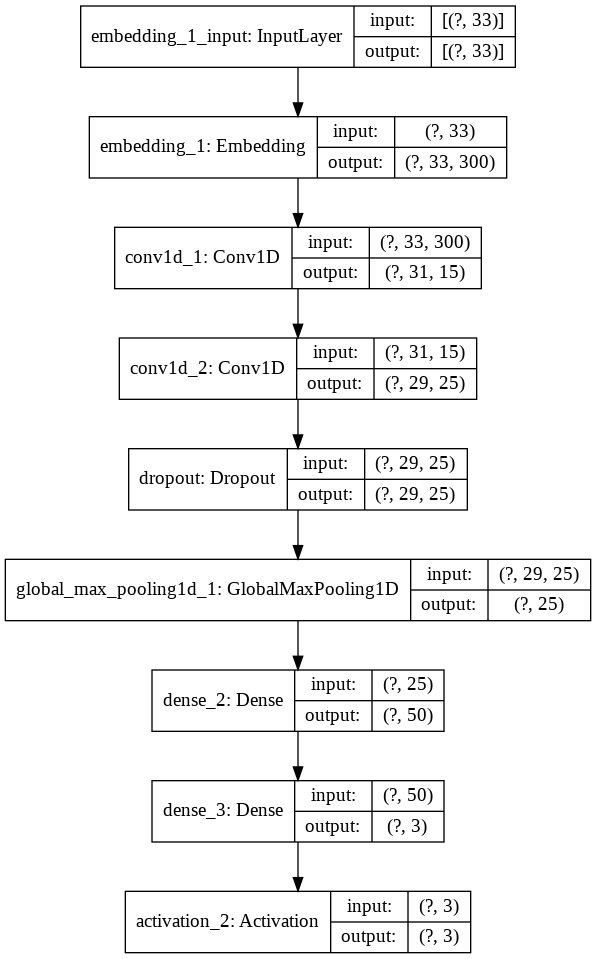

In [65]:
plot_model(model_CNN, to_file='model_plot2.png', show_shapes=True, show_layer_names=True)

In [76]:
model_CNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# We train (fit our data to) our model
history_CNN = model_CNN.fit(x_train2, y_train_ar, epochs=epochs, 
                            batch_size=batch_size, verbose=1, 
                            validation_data=(x_test2, y_test_ar),callbacks=[es])

Epoch 1/100
277/277 [==============================] - 3s 9ms/step - loss: 0.6318 - accuracy: 0.7773 - val_loss: 0.6185 - val_accuracy: 0.7917
Epoch 2/100
277/277 [==============================] - 2s 9ms/step - loss: 0.5351 - accuracy: 0.7958 - val_loss: 0.5323 - val_accuracy: 0.8025
Epoch 3/100
277/277 [==============================] - 2s 9ms/step - loss: 0.4875 - accuracy: 0.8127 - val_loss: 0.5313 - val_accuracy: 0.7994
Epoch 4/100
277/277 [==============================] - 2s 9ms/step - loss: 0.4542 - accuracy: 0.8192 - val_loss: 0.5479 - val_accuracy: 0.7772
Epoch 5/100
277/277 [==============================] - 2s 9ms/step - loss: 0.4339 - accuracy: 0.8283 - val_loss: 0.5463 - val_accuracy: 0.7840
Epoch 6/100
277/277 [==============================] - 2s 9ms/step - loss: 0.3986 - accuracy: 0.8449 - val_loss: 0.6119 - val_accuracy: 0.7298
Epoch 7/100
277/277 [==============================] - 2s 9ms/step - loss: 0.3624 - accuracy: 0.8589 - val_loss: 0.5785 - val_accuracy: 0.7610

number of epochs (x axis) vs. accuracy (y axis) plot

Model with Early Stopping



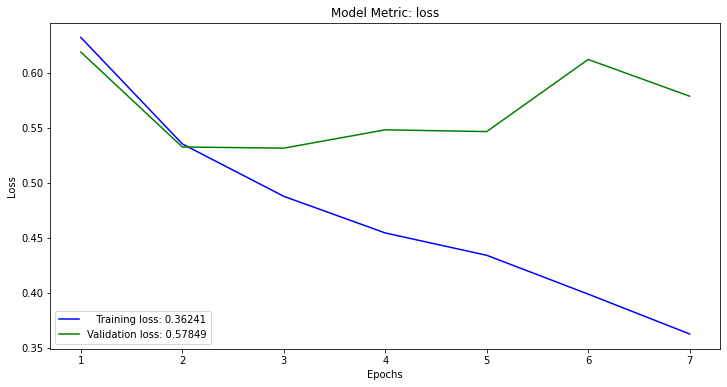

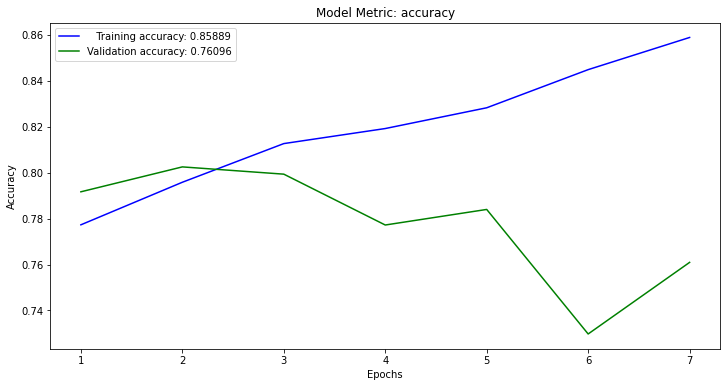

In [77]:
print('number of epochs (x axis) vs. accuracy (y axis) plot\n')
print('Model with Early Stopping\n')
plot_keras_history(history_CNN)   

In [ ]:
# Evaluate the trained model on the test set and store on score variable

score_CNN = model_CNN.evaluate(
    x_test2,                   # features
    y_test_ar,                 # labels
    batch_size=batch_size,     # batch size
    verbose=1                  # the most extended verbose
)

print('\nTest categorical_crossentropy: {:.3f}'.format(score_CNN[0]))
print('\nTest accuracy: {:.4f} %'.format(score_CNN[1]*100))

70/70 [==============================] - 0s 3ms/step - loss: 0.5239 - accuracy: 0.7917

Test categorical_crossentropy: 0.524

Test accuracy: 79.1686 %


In [81]:
y_pred_class_CNN = np.argmax(model_CNN.predict(x_test2), axis=-1)

In [ ]:
# More Evaluation Metrics
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

conf_mat_CNN = confusion_matrix(y_true=y_test_ar.argmax(axis=1), y_pred=y_pred_class_CNN)

pd.DataFrame(conf_mat_CNN, columns = np.unique(y_train_temp), index=np.unique(y_train_temp))

,NO LABEL,EVIDENCE,CLAIM
NO LABEL,66,16,116
EVIDENCE,14,66,217
CLAIM,15,83,1620
